# <span style='color:blue'>Projet N° 4 : Anticipez les besoins en consommation de bâtiments - **NETTOYAGE** </span>




 <span style='color:blue'> Objectifs du projet :
- La ville s’intéresse à la consommation et aux émissions des bâtiments non destinés aux émissions
- Prédire les  émissions de CO2 et la consommation totale d’énergie des bâtiments pour lesquels ils n’ont pas étés effectués
- Prédiction basée sur la taille, usage, date de construction, situation géographique
- Réaliser une Analyse exploratoire
- Tester les différents mùodels de prédiction


In [ ]:
#Importation des librairies :
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#IMPORTATION VIA GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importation du dataframe et etat des colonnes et variables
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P4/p4.csv')
pd.options.display.max_columns = None

### <span style='color:blue'> I - NETTOYAGE ET INSPECTION  </span>

## A.Dataframe

In [ ]:
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")
print("10 premières observations")
display(df.head(5))

Nombre de lignes: 3376
Nombre de colonnes: 46
10 premières observations


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [ ]:
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.00000,3376.00000,3360.00000,3376.00000,3376.00000,3376.00000,3376.00000,3368.00000,3376.00000,3376.00000,3376.00000,3376.00000,3356.00000,1679.00000,596.00000,2533.00000,3369.00000,3370.00000,3367.00000,3367.00000,3371.00000,3370.00000,3367.00000,3367.00000,3367.00000,3367.00000,3367.00000,0.00000,3367.00000,3367.00000
mean,21208.99111,2016.00000,98116.94911,4.43928,47.62403,-122.33480,1968.57316,1.10689,4.70912,94833.53732,8001.52607,86832.01126,79177.63856,28444.07582,11738.67517,67.91867,54.73212,57.03380,134.23285,137.78393,5403667.29453,5276725.71439,274595.89821,1086638.96657,3707612.16159,13685.04538,1368504.54144,nan,119.72397,1.17592
std,12223.75701,0.00000,18.61520,2.12063,0.04776,0.02720,33.08816,2.10840,5.49446,218837.60712,32326.72393,207939.81192,201703.40749,54392.91793,29331.19929,26.87327,56.27312,57.16333,139.28755,139.10981,21610628.62764,15938786.48412,3912173.39270,4352478.35521,14850656.13896,67097.80830,6709780.83488,nan,538.83223,1.82145
min,1.00000,2016.00000,98006.00000,1.00000,47.49917,-122.41425,1900.00000,0.00000,0.00000,11285.00000,0.00000,3636.00000,5656.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,-2.10000,0.00000,0.00000,0.00000,-33826.80078,-115417.00000,0.00000,0.00000,nan,-0.80000,-0.02000
25%,19990.75000,2016.00000,98105.00000,3.00000,47.59986,-122.35066,1948.00000,1.00000,2.00000,28487.00000,0.00000,27756.00000,25094.75000,5000.00000,2239.00000,53.00000,27.90000,29.40000,74.70000,78.40000,925128.59375,970182.23438,0.00000,187422.94535,639487.00000,0.00000,0.00000,nan,9.49500,0.21000
50%,23112.00000,2016.00000,98115.00000,4.00000,47.61867,-122.33249,1975.00000,1.00000,4.00000,44175.00000,0.00000,43216.00000,39894.00000,10664.00000,5043.00000,75.00000,38.60000,40.90000,96.20000,101.10000,1803753.25000,1904452.00000,0.00000,345129.90630,1177583.00000,3237.53760,323754.00000,nan,33.92000,0.61000
75%,25994.25000,2016.00000,98122.00000,7.00000,47.65712,-122.31941,1997.00000,1.00000,5.00000,90992.00000,0.00000,84276.25000,76200.25000,26640.00000,10138.75000,90.00000,60.40000,64.27500,143.89999,148.35000,4222455.25000,4381429.12500,0.00000,829317.84375,2829632.50000,11890.33496,1189033.50000,nan,93.94000,1.37000
max,50226.00000,2016.00000,98272.00000,7.00000,47.73387,-122.22097,2015.00000,111.00000,99.00000,9320156.00000,512608.00000,9320156.00000,9320156.00000,686750.00000,459748.00000,100.00000,834.40002,834.40002,2620.00000,2620.00000,873923712.00000,471613856.00000,134943456.00000,192577488.00000,657074389.00000,2979090.00000,297909000.00000,nan,16870.98000,34.09000


On convertit les  colonnes "ZipCode", "OSEBuildingID", "CouncilDistrictCode" et "YearBuilt" en nombres entiers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Cette fonction nous permets de voir les variables dont ils manque des observations.
Après analyse voici comment je vais procéder pour chacunes des variables:
0. Modifier le types de variable
1. Supprimer les variables inutiles( 'Comments','City','State','DataYear','DefaultData','YearsENERGYSTARCertified',Outlier, ect)
2. Supprimer ou non les lignes de la variable "NumberofBuildings" manquantes (il n'y en a que 8 cela n'aura pas d'incidence)
3. Remplacer les valeurs manquantes par la medianne :On remarque déjà que certaines variables comptent un grand nombre de NULL  Nous allons calculer le pourcentage de valeurs manquantes pour chaque variable.


In [ ]:
df["ZipCode"] = df["ZipCode"].astype(object)
df["OSEBuildingID"] = df["OSEBuildingID"].astype(object)
df["CouncilDistrictCode"] = df["CouncilDistrictCode"].astype(object)
df["YearBuilt"] = df["YearBuilt"].astype(object)


In [ ]:
columns_to_categorize = ["DataYear", "BuildingType", "CouncilDistrictCode", "ComplianceStatus", "Outlier", "Neighborhood",
                         'NumberofBuildings','NumberofFloors', 'ListOfAllPropertyUseTypes','LargestPropertyUseType']


In [ ]:
df[columns_to_categorize] = df[columns_to_categorize].astype('category')

In [ ]:
# Suppression des colonnes inutiles
df = df.drop(['Comments','ZipCode','City','State','DefaultData','PropertyName','YearsENERGYSTARCertified','NaturalGas(kBtu)','ComplianceStatus'	,'Outlier','ThirdLargestPropertyUseTypeGFA','SourceEUI(kBtu/sf)','ThirdLargestPropertyUseType','Electricity(kBtu)','PropertyName' ,'TaxParcelIdentificationNumber', 'SecondLargestPropertyUseTypeGFA','PropertyGFATotal','CouncilDistrictCode','PropertyGFABuilding(s)','SecondLargestPropertyUseType','SiteEnergyUse(kBtu)','LargestPropertyUseTypeGFA','SiteEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'],axis=1)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,405 Olive way,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,0,Hotel,Hotel,60.0,84.300003,2003882.00,1.156514e+06,12764.529300,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,15064,"Hotel, Parking, Restaurant",Hotel,61.0,97.900002,0.00,9.504252e+05,51450.816410,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,196718,Hotel,Hotel,43.0,97.699997,21566554.00,1.451544e+07,14938.000000,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 STEWART ST,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,0,Hotel,Hotel,56.0,113.300003,2214446.25,8.115253e+05,18112.130860,286.43,4.67
4,8,2016,NonResidential,Hotel,401 LENORA ST,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,62000,"Hotel, Parking, Swimming Pool",Hotel,75.0,118.699997,0.00,1.573449e+06,88039.984380,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,1600 S Dakota St,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,0,Office,Office,46.0,76.699997,0.00,1.536550e+05,3254.750244,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,719 8th Ave S,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,0,Other - Recreation,Other - Recreation,NaN,65.900002,0.00,1.162210e+05,5537.299805,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,1920 1st Ave W,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,0,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,NaN,460.100006,0.00,5.252517e+05,39737.390630,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th Ave S,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,0,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,NaN,55.500000,0.00,1.022480e+05,3706.010010,22.11,1.57


In [ ]:
df.isnull().sum(axis = 0)

OSEBuildingID                  0
DataYear                       0
BuildingType                   0
PrimaryPropertyType            0
Address                        0
Neighborhood                   0
Latitude                       0
Longitude                      0
YearBuilt                      0
NumberofBuildings              8
NumberofFloors                 0
PropertyGFAParking             0
ListOfAllPropertyUseTypes      9
LargestPropertyUseType        20
ENERGYSTARScore              843
SiteEUIWN(kBtu/sf)             6
SteamUse(kBtu)                 9
Electricity(kWh)               9
NaturalGas(therms)             9
TotalGHGEmissions              9
GHGEmissionsIntensity          9
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3371    False
3372    False
3373    False
3374    False
3375    False
Length: 3376, dtype: bool

In [ ]:
df.drop_duplicates()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,405 Olive way,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,0,Hotel,Hotel,60.0,84.300003,2003882.00,1.156514e+06,12764.529300,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,15064,"Hotel, Parking, Restaurant",Hotel,61.0,97.900002,0.00,9.504252e+05,51450.816410,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,196718,Hotel,Hotel,43.0,97.699997,21566554.00,1.451544e+07,14938.000000,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 STEWART ST,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,0,Hotel,Hotel,56.0,113.300003,2214446.25,8.115253e+05,18112.130860,286.43,4.67
4,8,2016,NonResidential,Hotel,401 LENORA ST,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,62000,"Hotel, Parking, Swimming Pool",Hotel,75.0,118.699997,0.00,1.573449e+06,88039.984380,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,1600 S Dakota St,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,0,Office,Office,46.0,76.699997,0.00,1.536550e+05,3254.750244,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,719 8th Ave S,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,0,Other - Recreation,Other - Recreation,NaN,65.900002,0.00,1.162210e+05,5537.299805,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,1920 1st Ave W,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,0,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,NaN,460.100006,0.00,5.252517e+05,39737.390630,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th Ave S,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,0,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,NaN,55.500000,0.00,1.022480e+05,3706.010010,22.11,1.57


In [ ]:
#Remplacer les valeurs manquantes par la médiane
median_ENERGYSTARScore  = df['ENERGYSTARScore'].median()
df['ENERGYSTARScore'].fillna(median_ENERGYSTARScore, inplace=True)

median_ENERGYSTARScore  = df['NaturalGas(therms)'].median()
df['NaturalGas(therms)'].fillna(median_ENERGYSTARScore, inplace=True)



In [ ]:
# Supression de lignes
df.dropna(subset=['LargestPropertyUseType'], inplace=True)


In [ ]:
df.isnull().sum(axis = 0)

OSEBuildingID                0
DataYear                     0
BuildingType                 0
PrimaryPropertyType          0
Address                      0
Neighborhood                 0
Latitude                     0
Longitude                    0
YearBuilt                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFAParking           0
ListOfAllPropertyUseTypes    0
LargestPropertyUseType       0
ENERGYSTARScore              0
SiteEUIWN(kBtu/sf)           1
SteamUse(kBtu)               0
Electricity(kWh)             0
NaturalGas(therms)           0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
dtype: int64

In [ ]:
df.dropna(subset=['SiteEUIWN(kBtu/sf)'], inplace=True)

In [ ]:
df.isnull().sum(axis = 0)

OSEBuildingID                0
DataYear                     0
BuildingType                 0
PrimaryPropertyType          0
Address                      0
Neighborhood                 0
Latitude                     0
Longitude                    0
YearBuilt                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFAParking           0
ListOfAllPropertyUseTypes    0
LargestPropertyUseType       0
ENERGYSTARScore              0
SiteEUIWN(kBtu/sf)           0
SteamUse(kBtu)               0
Electricity(kWh)             0
NaturalGas(therms)           0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
dtype: int64

In [ ]:
#df.min()

In [ ]:
BuildingType= df.BuildingType.value_counts()
PrimaryPropertyType= df.PrimaryPropertyType.value_counts()
Neighborhood = df.Neighborhood.value_counts()
NumberofBuildings= df.NumberofBuildings.value_counts()
NumberofFloors= df.NumberofFloors.value_counts()
LargestPropertyUseType= df.LargestPropertyUseType.value_counts()
ListOfAllPropertyUseTypes= df.ListOfAllPropertyUseTypes.value_counts()
YearBuilt=df.YearBuilt.value_counts()

In [ ]:
#print("{} catégories sont représentées dans la variable ZipCode".format(len(ZipCode)))
print("{} catégories sont représentées dans la variable BuildingType.".format(len(BuildingType)))
print("{} catégories sont représentées dans la variable PrimaryPropertyType".format(len(PrimaryPropertyType)))
print("{} catégories sont représentées dans la variable Neighborhood".format(len(Neighborhood)))
print("{} catégories sont représentées dans la variable NumberofFloors".format(len(NumberofFloors)))
print("{} catégories sont représentées dans la variable ListOfAllPropertyUseTypes.".format(len(ListOfAllPropertyUseTypes)))
print("{} catégories sont représentées dans la variable LargestPropertyUseType".format(len(LargestPropertyUseType)))
print("{} catégories sont représentées dans la variable YearBuilt".format(len(YearBuilt)))
print("{} catégories sont représentées dans la variable NumberofBuildings".format(len(NumberofBuildings)))

8 catégories sont représentées dans la variable BuildingType.
24 catégories sont représentées dans la variable PrimaryPropertyType
19 catégories sont représentées dans la variable Neighborhood
50 catégories sont représentées dans la variable NumberofFloors
466 catégories sont représentées dans la variable ListOfAllPropertyUseTypes.
56 catégories sont représentées dans la variable LargestPropertyUseType
113 catégories sont représentées dans la variable YearBuilt
17 catégories sont représentées dans la variable NumberofBuildings


In [ ]:
df[df['NumberofBuildings'] == 0]['NumberofBuildings'] = 1

<ipython-input-22-e3b7351f4056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['NumberofBuildings'] == 0]['NumberofBuildings'] = 1


In [ ]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,405 Olive way,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,0,Hotel,Hotel,60.0,84.300003,2003882.00,1.156514e+06,12764.529300,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,15064,"Hotel, Parking, Restaurant",Hotel,61.0,97.900002,0.00,9.504252e+05,51450.816410,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,196718,Hotel,Hotel,43.0,97.699997,21566554.00,1.451544e+07,14938.000000,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 STEWART ST,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,0,Hotel,Hotel,56.0,113.300003,2214446.25,8.115253e+05,18112.130860,286.43,4.67
4,8,2016,NonResidential,Hotel,401 LENORA ST,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,62000,"Hotel, Parking, Swimming Pool",Hotel,75.0,118.699997,0.00,1.573449e+06,88039.984380,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,1600 S Dakota St,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,0,Office,Office,46.0,76.699997,0.00,1.536550e+05,3254.750244,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,719 8th Ave S,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,0,Other - Recreation,Other - Recreation,75.0,65.900002,0.00,1.162210e+05,5537.299805,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,1920 1st Ave W,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,0,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,75.0,460.100006,0.00,5.252517e+05,39737.390630,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th Ave S,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,0,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,75.0,55.500000,0.00,1.022480e+05,3706.010010,22.11,1.57


## B.Distribution des variables catégorielles

Les variables catégorielles suceptibles de nous interesser et que nous utiliseront tout au long de notre exploiration de données:

* 8 catégories sont représentées dans la variable BuildingType
* 24 catégories sont représentées dans la variable PrimaryPropertyType
* 19 catégories sont représentées dans la variable Neighborhood
* 50 catégories sont représentées dans la variable NumberofFloors
* 113 catégories sont représentées dans la variable YearBuilt
* 17 catégories sont représentées dans la variable NumberofBuildings






### Variable "BuildingType"

<ipython-input-24-cf5ce2bf6b48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="BuildingType", palette='Set2')


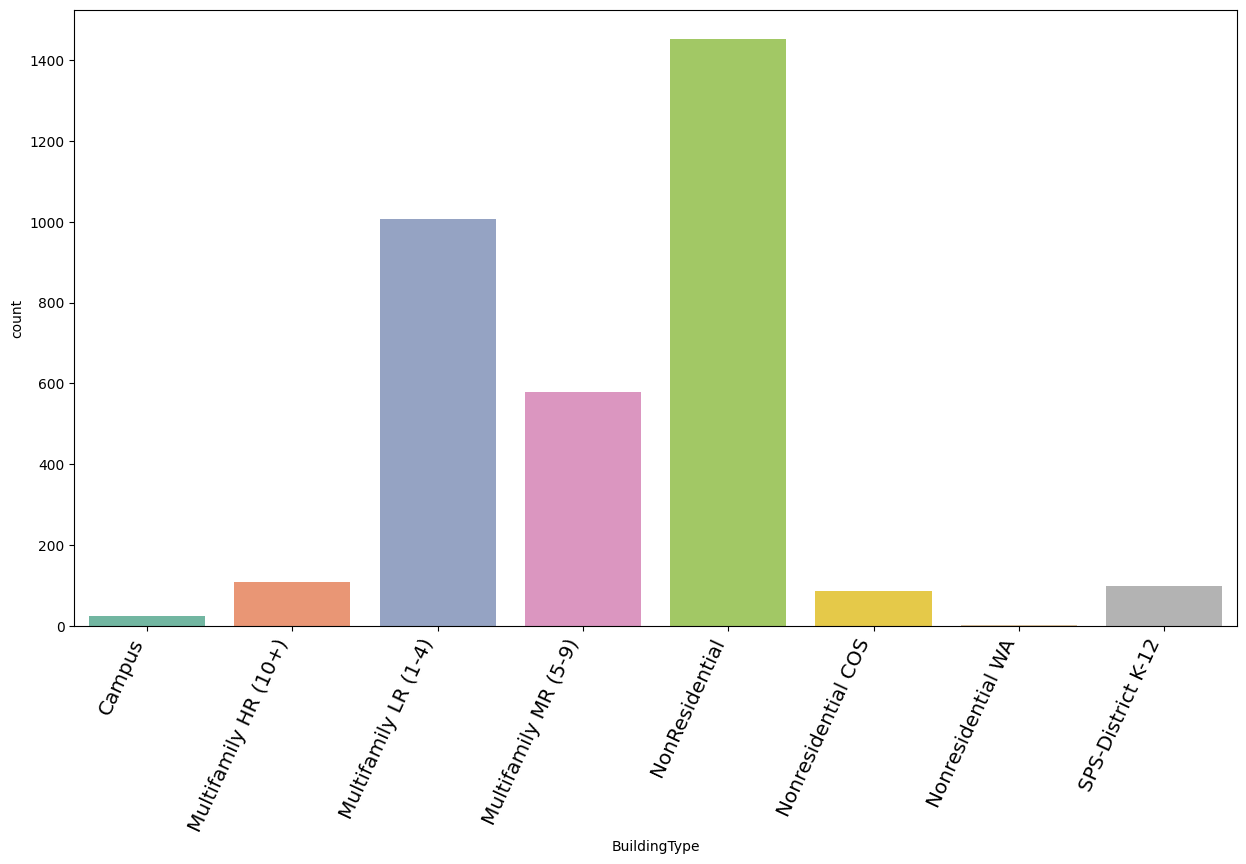

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="BuildingType", palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

In [ ]:
df['BuildingType'].value_counts()

BuildingType
NonResidential          1453
Multifamily LR (1-4)    1007
Multifamily MR (5-9)     579
Multifamily HR (10+)     108
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [ ]:
#df.drop(df.loc[df['BuildingType'] == "Multifamily LR (1-4)"].index, inplace=True)


#df.drop(df[(df['BuildingType'] == "Multifamily LR (1-4)") | (df['BuildingType'] == 'Multifamily MR (5-9)') | (df['BuildingType'] == 'Multifamily HR (10+)')].index, inplace=True)


In [ ]:
#La variable 'BuildingType' comporte des observations inutiles dans le cadre de notre exploration
#En effet les observations  "Multifamily LR (1-4)"et 'Multifamily MR (5-9)' concernent les immeubles à usage d'habitation
df.drop(df[(df['BuildingType'] == "Multifamily LR (1-4)") | (df['BuildingType'] == 'Multifamily MR (5-9)') | (df['BuildingType'] == 'Multifamily HR (10+)')].index, inplace=True)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,405 Olive way,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,0,Hotel,Hotel,60.0,84.300003,2003882.00,1.156514e+06,12764.529300,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,15064,"Hotel, Parking, Restaurant",Hotel,61.0,97.900002,0.00,9.504252e+05,51450.816410,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,196718,Hotel,Hotel,43.0,97.699997,21566554.00,1.451544e+07,14938.000000,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 STEWART ST,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,0,Hotel,Hotel,56.0,113.300003,2214446.25,8.115253e+05,18112.130860,286.43,4.67
4,8,2016,NonResidential,Hotel,401 LENORA ST,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,62000,"Hotel, Parking, Swimming Pool",Hotel,75.0,118.699997,0.00,1.573449e+06,88039.984380,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,1600 S Dakota St,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,0,Office,Office,46.0,76.699997,0.00,1.536550e+05,3254.750244,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,719 8th Ave S,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,0,Other - Recreation,Other - Recreation,75.0,65.900002,0.00,1.162210e+05,5537.299805,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,1920 1st Ave W,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,0,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,75.0,460.100006,0.00,5.252517e+05,39737.390630,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th Ave S,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,0,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,75.0,55.500000,0.00,1.022480e+05,3706.010010,22.11,1.57


<ipython-input-28-cf5ce2bf6b48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="BuildingType", palette='Set2')


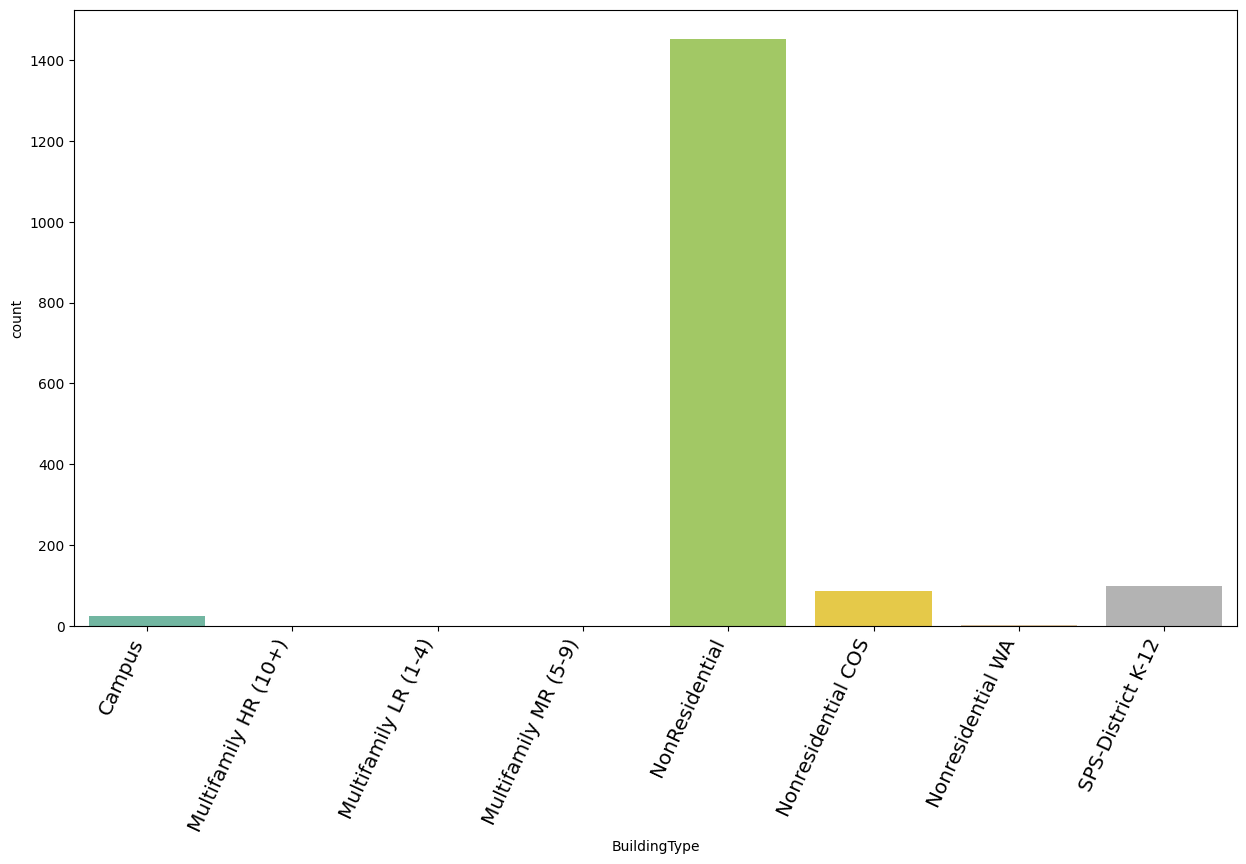

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="BuildingType", palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

### Variable "PrimaryPropertyType"

<ipython-input-29-83f3a8277f8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="PrimaryPropertyType", palette='Set2')


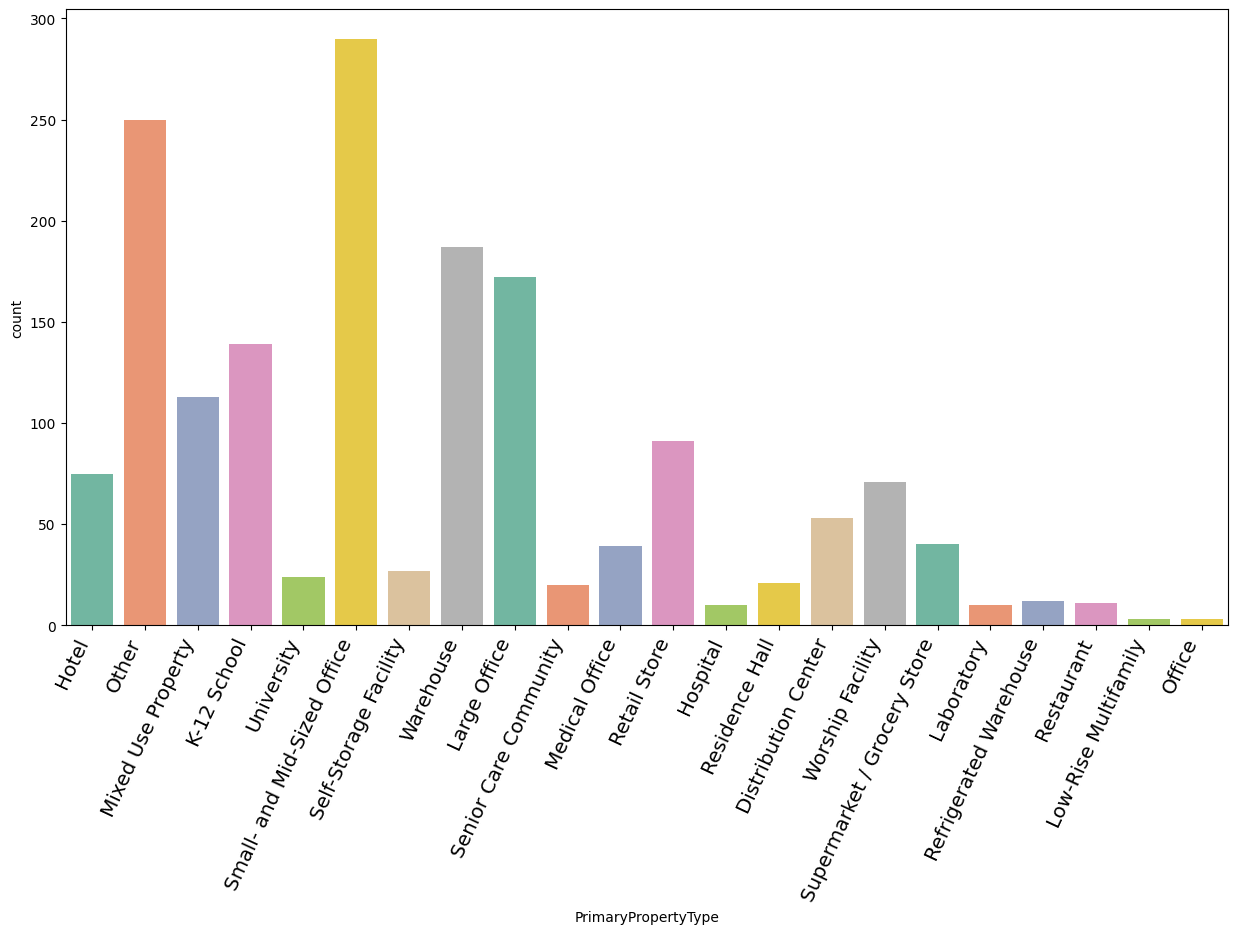

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="PrimaryPropertyType", palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

In [ ]:
df['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    290
Other                          250
Warehouse                      187
Large Office                   172
K-12 School                    139
Mixed Use Property             113
Retail Store                    91
Hotel                           75
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           27
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: count, dtype: int64

### Variable 'Neighborhood'

<ipython-input-31-c1e5fa3c4653>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Neighborhood', palette='Set2')


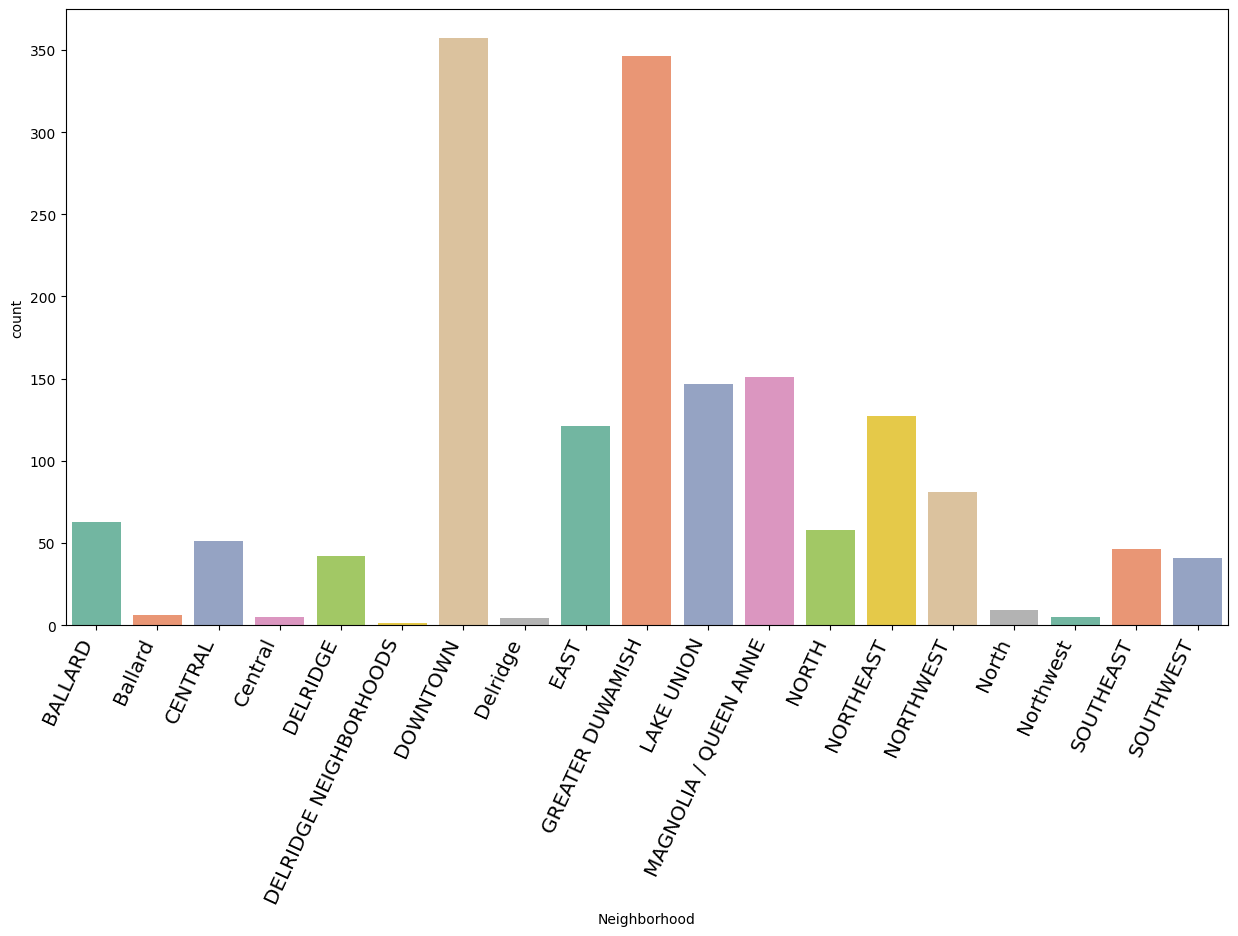

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Neighborhood', palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

On remarque dans cette variable que pluieurs sorties sont les mêmes non allons donc les modifier.

In [ ]:
 df['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  357
GREATER DUWAMISH          346
MAGNOLIA / QUEEN ANNE     151
LAKE UNION                147
NORTHEAST                 127
EAST                      121
NORTHWEST                  81
BALLARD                    63
NORTH                      58
CENTRAL                    51
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [ ]:
#MODIFICATION DES CATEGORIES
df["Neighborhood"] = df["Neighborhood"].replace(["North", "Ballard","Central", "Northwest", "Delridge","DELRIDGE NEIGHBORHOODS"], ["NORTH", "BALLARD","CENTRAL" ,"NORTHWEST","DELRIDGE","DELRIDGE"])

<ipython-input-34-c1e5fa3c4653>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Neighborhood', palette='Set2')


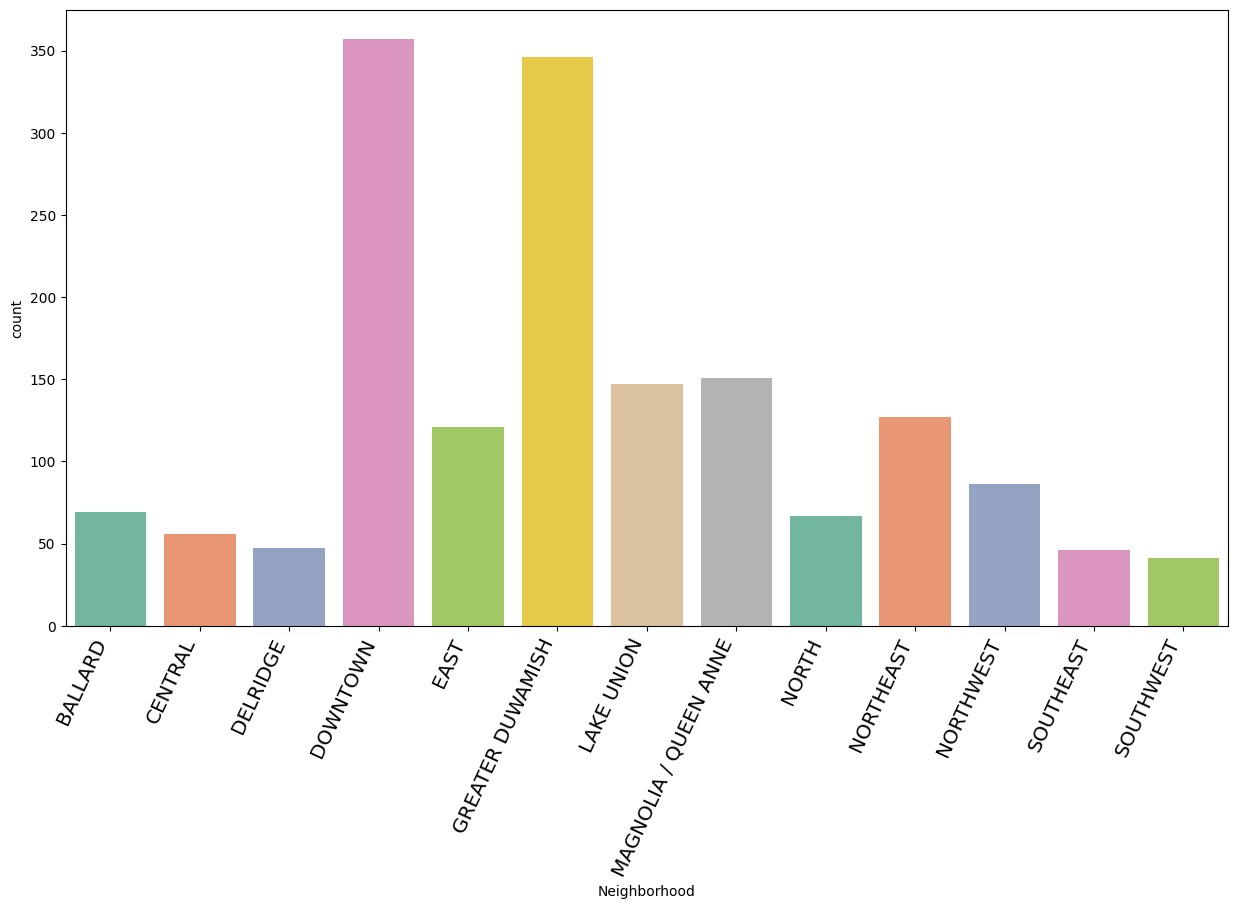

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Neighborhood', palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

In [ ]:
df['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                 357
GREATER DUWAMISH         346
MAGNOLIA / QUEEN ANNE    151
LAKE UNION               147
NORTHEAST                127
EAST                     121
NORTHWEST                 86
BALLARD                   69
NORTH                     67
CENTRAL                   56
DELRIDGE                  47
SOUTHEAST                 46
SOUTHWEST                 41
Name: count, dtype: int64

In [ ]:
Neighborhood = df.Neighborhood.value_counts()
print("{} catégories sont représentées dans la variable Neighborhood".format(len(Neighborhood)))

13 catégories sont représentées dans la variable Neighborhood


### Variable 'NumberofFloors'

<ipython-input-37-4e1ea9608545>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NumberofFloors', palette='Set2')


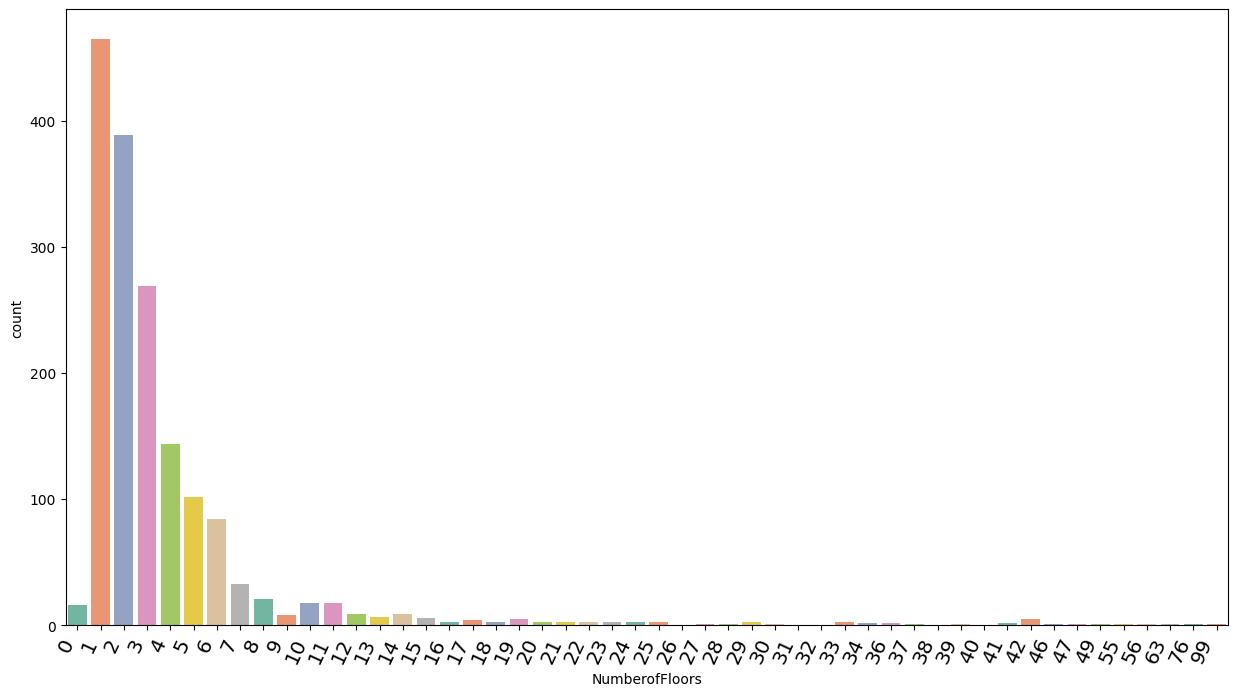

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='NumberofFloors', palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

In [ ]:
df['NumberofFloors'].value_counts()

NumberofFloors
1     465
2     389
3     269
4     144
5     102
6      84
7      33
8      21
11     18
10     18
0      16
12      9
14      9
9       8
13      7
15      6
42      5
19      5
17      4
23      3
33      3
29      3
24      3
25      3
22      3
20      3
18      3
21      3
16      3
41      2
34      2
36      2
76      1
63      1
56      1
55      1
49      1
47      1
46      1
99      1
39      1
37      1
30      1
28      1
27      1
40      0
32      0
31      0
26      0
38      0
Name: count, dtype: int64

### Variable 'YearBuilt'

<ipython-input-39-04f732fb9c13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='YearBuilt', palette='Set2')


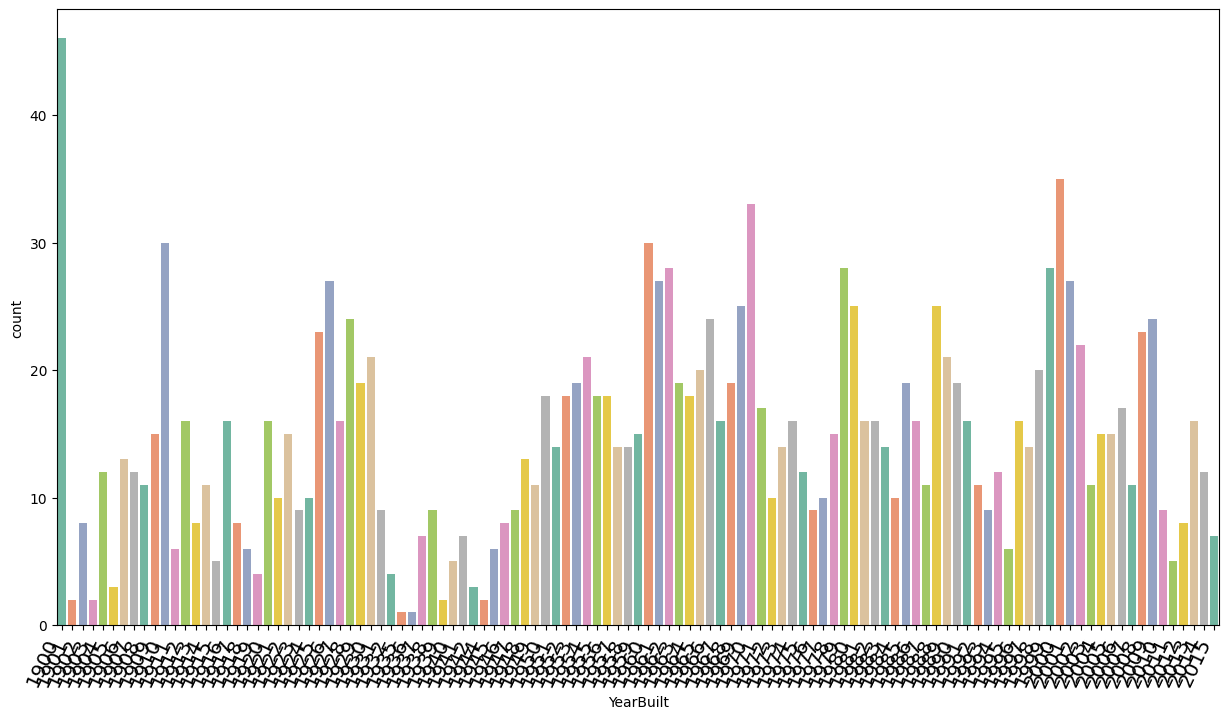

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='YearBuilt', palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

 ### Variable ListOfAllPropertyUseTypes

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(data=df, x='ListOfAllPropertyUseTypes', palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects


Output hidden; open in https://colab.research.google.com to view.

### Variable 'NumberofBuildings'

<ipython-input-41-ee15b1e16ae1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NumberofBuildings', palette='Set2')


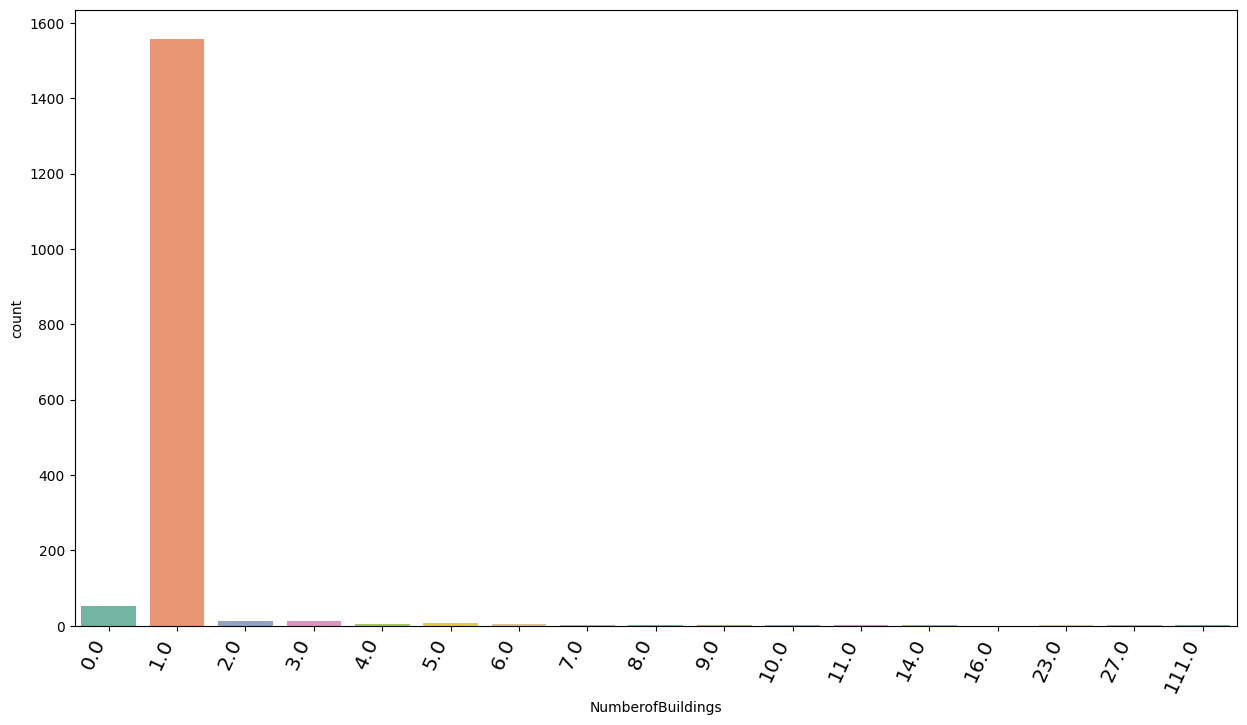

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='NumberofBuildings', palette='Set2')
plt.xticks(
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
None #don't show the label objects

## C.Distribution des variables quantitatives

Liste de svariables quantitatives que nous utiliserons:

* GHGEmissionsIntensity  
* NaturalGas(therms)
* ENERGYSTARScore                    
* PropertyGFAParking                                                            
* SiteEUIWN(kBtu/sf)                                       
* Electricity(kWh)
* SteamUse(kBtu)                     
                                   
                

### Variable "TotalGHGEmissions"

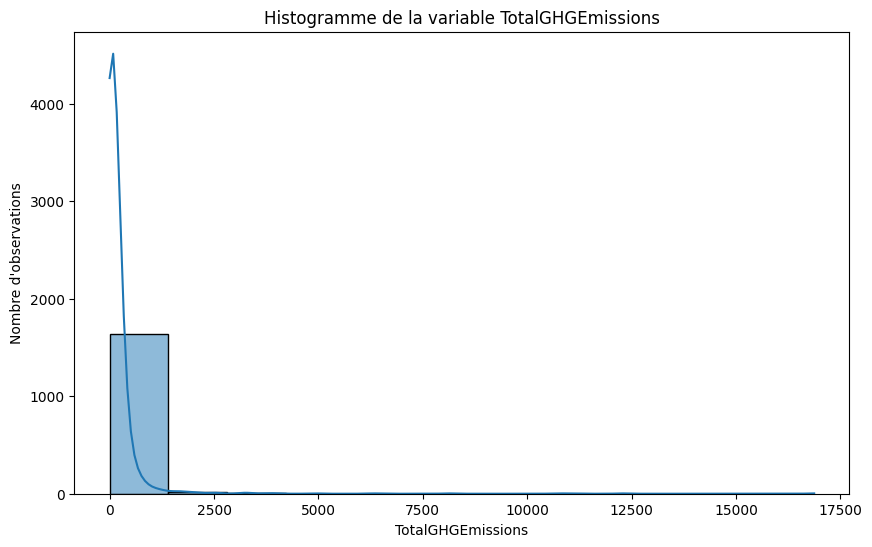

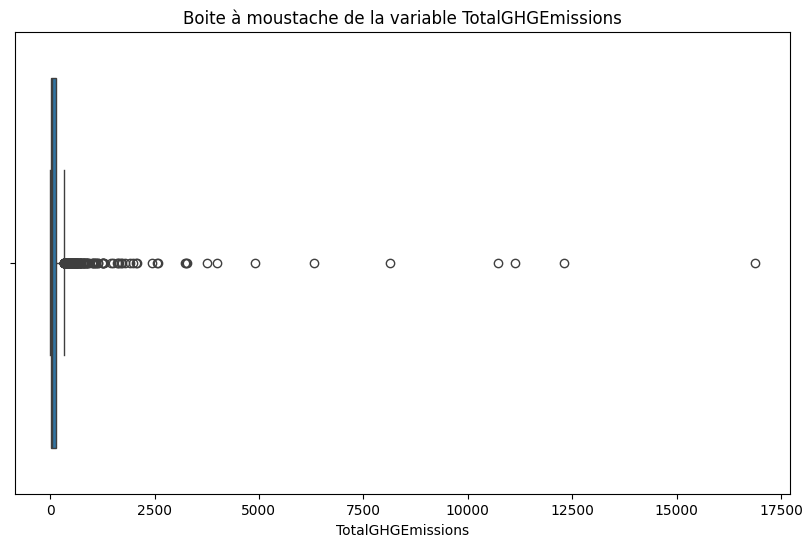

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count     1661.000000
mean       185.312649
std        753.076007
min         -0.800000
25%         19.890000
50%         49.580000
75%        142.390000
max      16870.980000
Name: TotalGHGEmissions, dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x="TotalGHGEmissions", bins="sturges", kde=True)
ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable TotalGHGEmissions")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='TotalGHGEmissions')
ax.set_title("Boite à moustache de la variable TotalGHGEmissions")
ax.set_xlabel("TotalGHGEmissions")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["TotalGHGEmissions"].describe().apply(lambda x: format(x, 'f'))

### Variable 'NaturalGas(therms)'

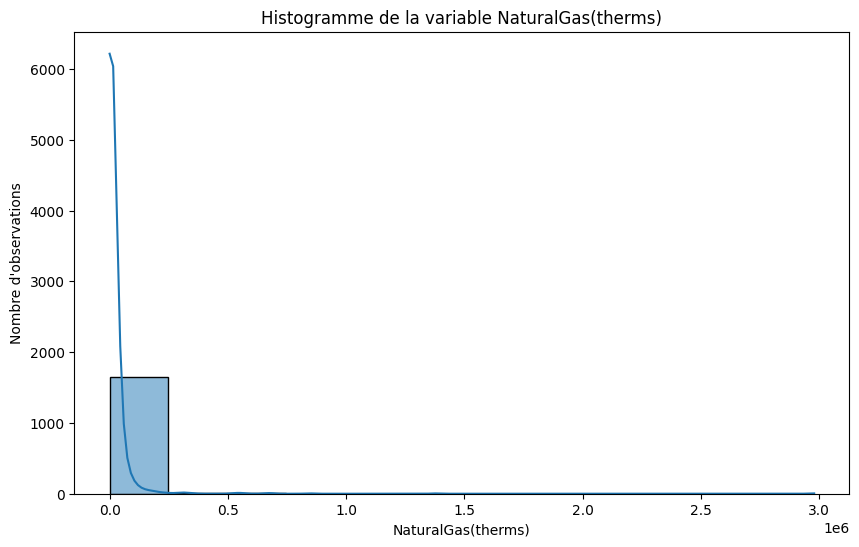

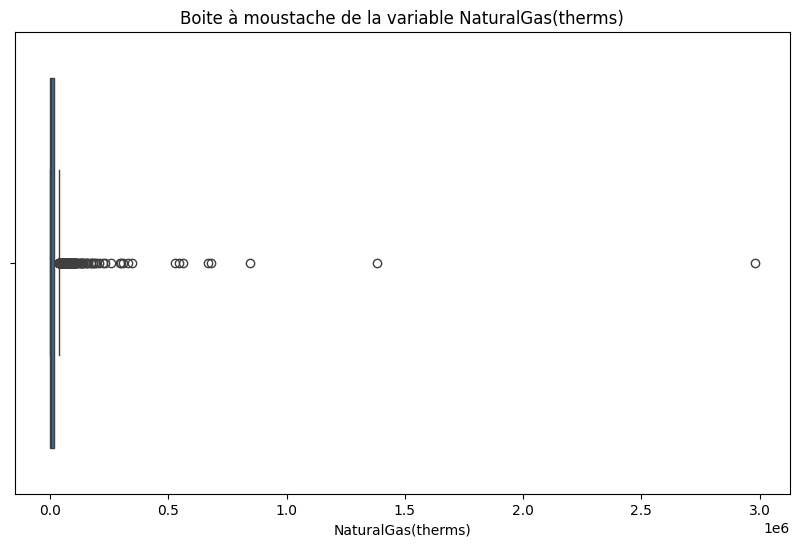

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count       1661.000000
mean       19737.878759
std        93846.113668
min            0.000000
25%            0.000000
50%         4995.090332
75%        15224.339840
max      2979090.000000
Name: NaturalGas(therms), dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='NaturalGas(therms)', bins="sturges", kde=True)
ax.set_xlabel("NaturalGas(therms)")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable NaturalGas(therms)")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='NaturalGas(therms)')
ax.set_title("Boite à moustache de la variable NaturalGas(therms)")
ax.set_xlabel("NaturalGas(therms)")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["NaturalGas(therms)"].describe().apply(lambda x: format(x, 'f'))

### Variable 'ENERGYSTARScore'

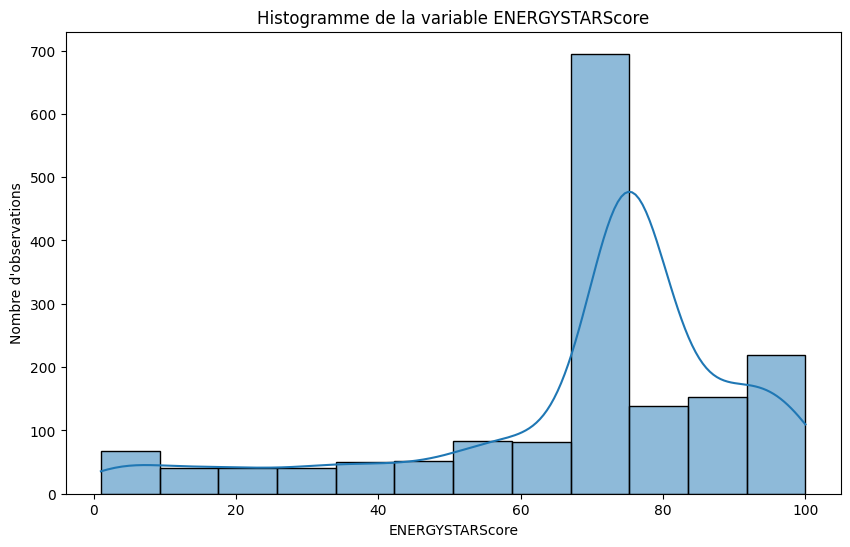

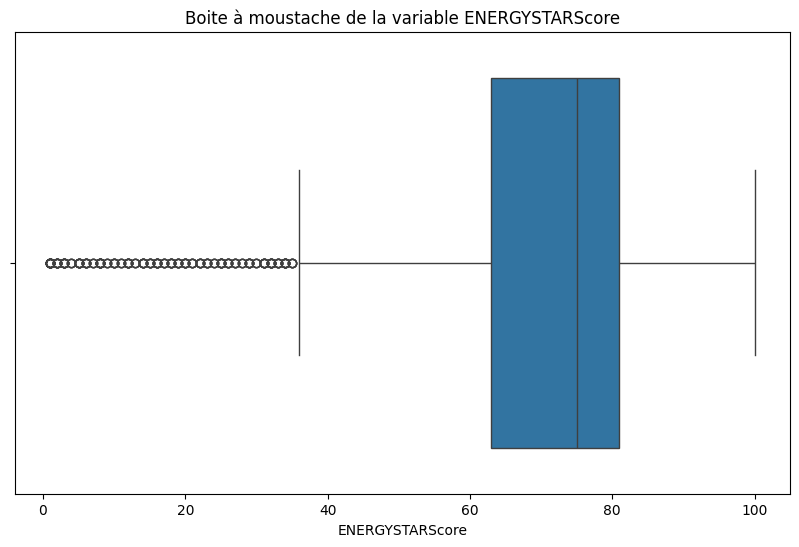

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count    1661.000000
mean       68.706201
std        23.539081
min         1.000000
25%        63.000000
50%        75.000000
75%        81.000000
max       100.000000
Name: ENERGYSTARScore, dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='ENERGYSTARScore', bins="sturges", kde=True)
ax.set_xlabel("ENERGYSTARScore")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable ENERGYSTARScore")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='ENERGYSTARScore')
ax.set_title("Boite à moustache de la variable ENERGYSTARScore")
ax.set_xlabel("ENERGYSTARScore")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["ENERGYSTARScore"].describe().apply(lambda x: format(x, 'f'))

### Variable 'PropertyGFAParking'

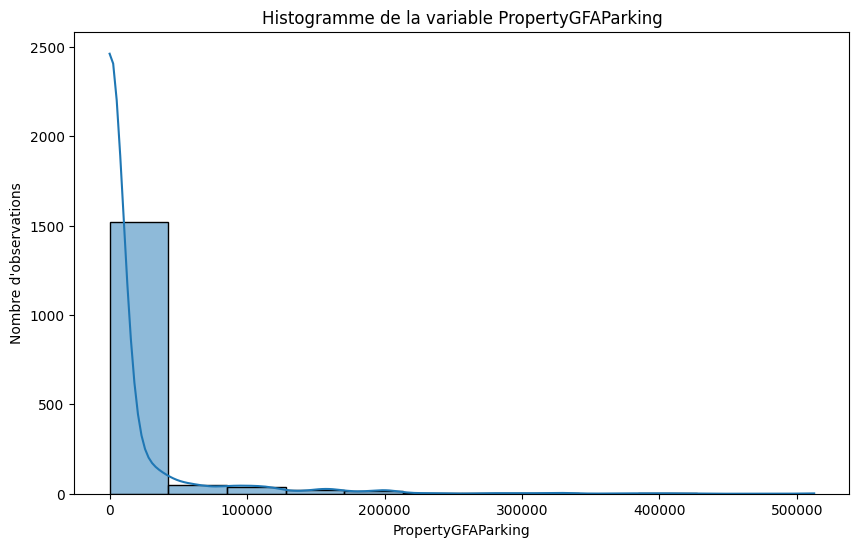

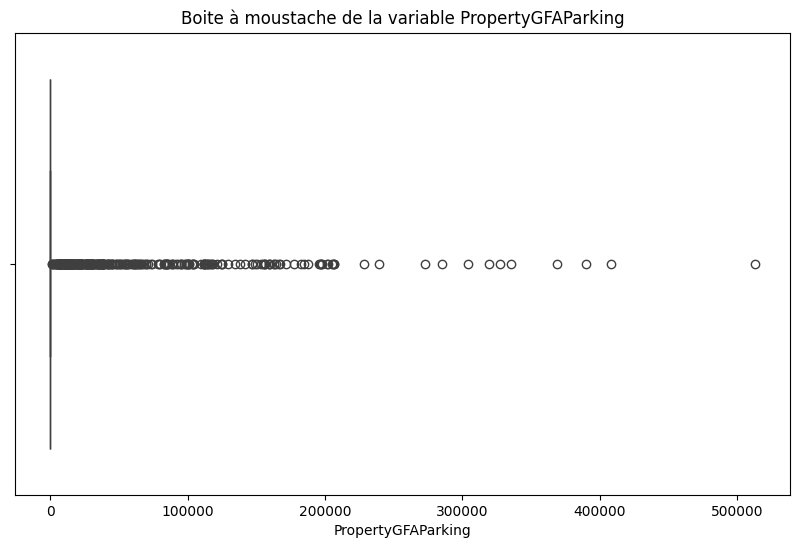

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count      1661.000000
mean      12899.860927
std       42317.217654
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='PropertyGFAParking', bins="sturges", kde=True)
ax.set_xlabel("PropertyGFAParking")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable PropertyGFAParking")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='PropertyGFAParking')
ax.set_title("Boite à moustache de la variable PropertyGFAParking")
ax.set_xlabel("PropertyGFAParking")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["PropertyGFAParking"].describe().apply(lambda x: format(x, 'f'))

### Variable 'SiteEUIWN(kBtu/sf)'

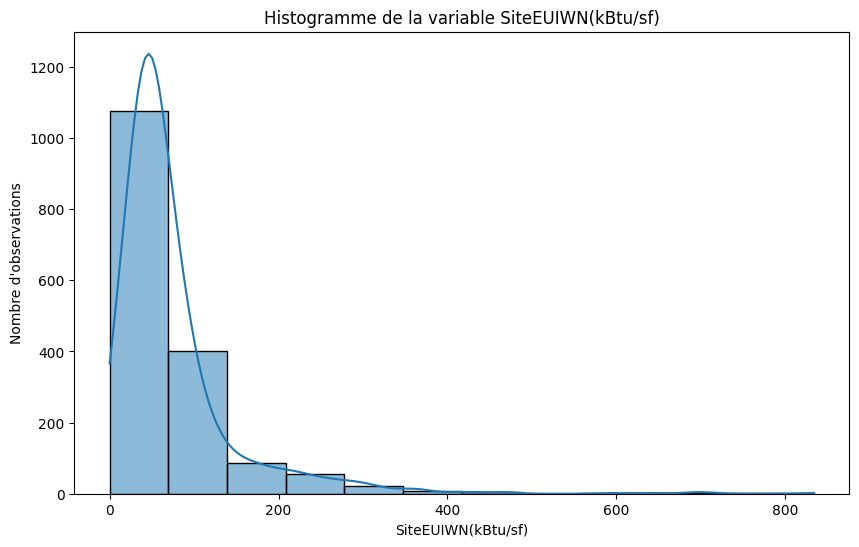

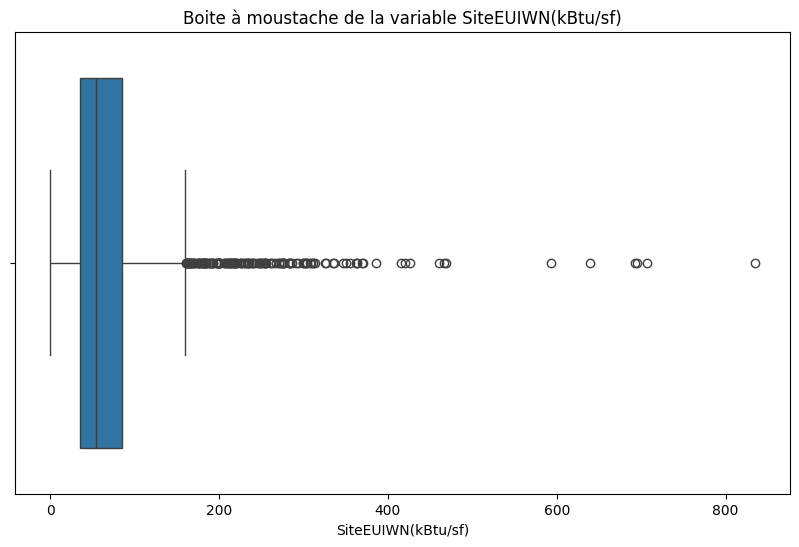

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count    1661.000000
mean       74.620650
std        75.107622
min         0.000000
25%        35.400002
50%        53.900002
75%        85.199997
max       834.400024
Name: SiteEUIWN(kBtu/sf), dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='SiteEUIWN(kBtu/sf)', bins="sturges", kde=True)
ax.set_xlabel("SiteEUIWN(kBtu/sf)")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable SiteEUIWN(kBtu/sf)")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='SiteEUIWN(kBtu/sf)')
ax.set_title("Boite à moustache de la variable SiteEUIWN(kBtu/sf)")
ax.set_xlabel("SiteEUIWN(kBtu/sf)")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["SiteEUIWN(kBtu/sf)"].describe().apply(lambda x: format(x, 'f'))

### Variable 'Electricity(kWh)'

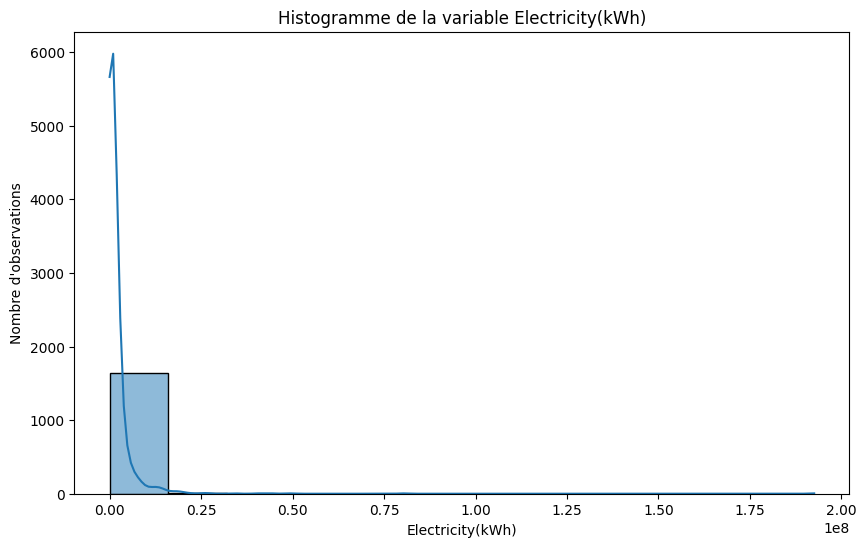

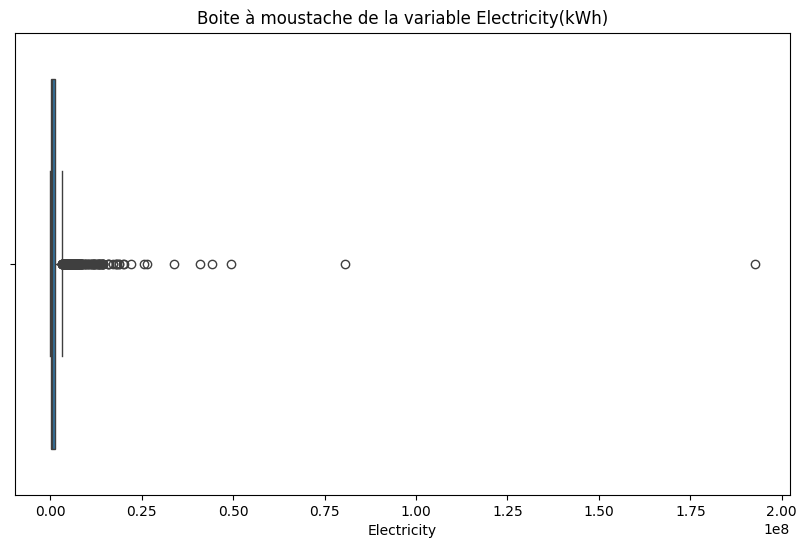

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count         1661.000000
mean       1715317.677735
std        6104103.203732
min         -33826.800780
25%         211296.796900
50%         471503.000000
75%        1422929.625000
max      192577488.000000
Name: Electricity(kWh), dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='Electricity(kWh)', bins="sturges", kde=True)
ax.set_xlabel("Electricity(kWh)")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable Electricity(kWh)")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='Electricity(kWh)')
ax.set_title("Boite à moustache de la variable Electricity(kWh)")
ax.set_xlabel("Electricity")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["Electricity(kWh)"].describe().apply(lambda x: format(x, 'f'))

### Variable 'SteamUse(kBtu)'

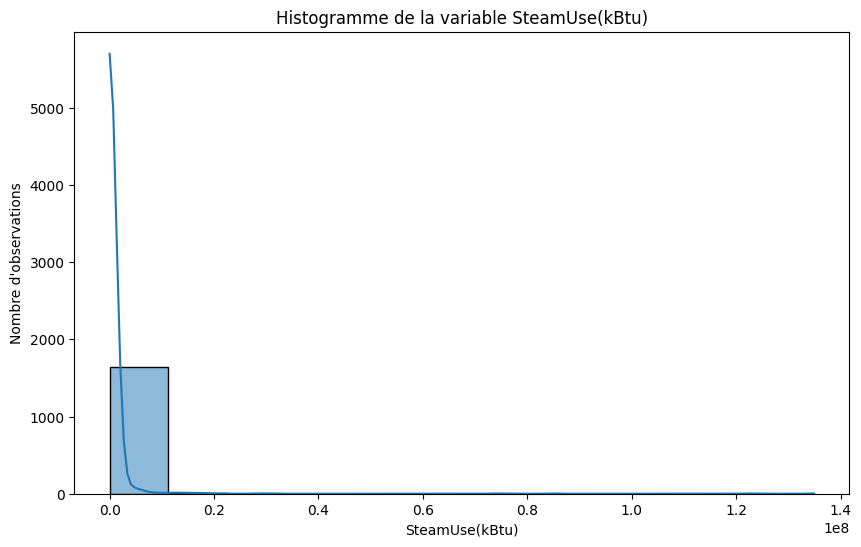

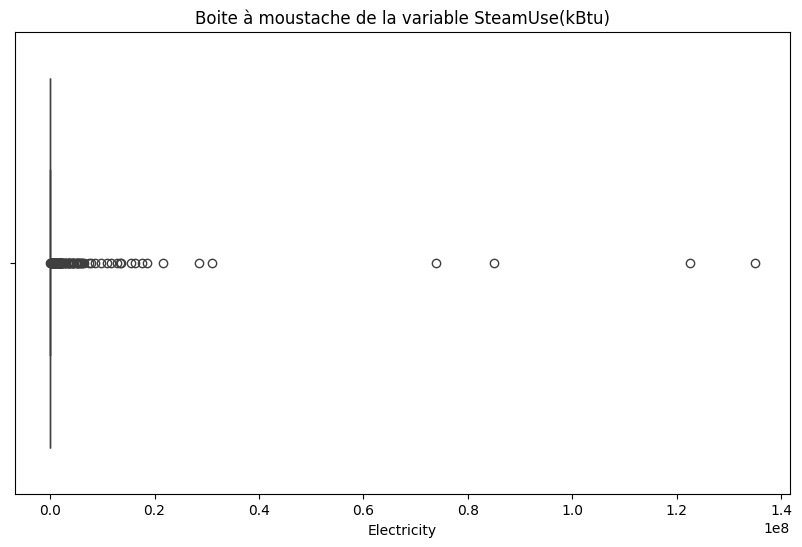

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count         1661.000000
mean        514115.528760
std        5522169.702665
min              0.000000
25%              0.000000
50%              0.000000
75%              0.000000
max      134943456.000000
Name: SteamUse(kBtu), dtype: object

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='SteamUse(kBtu)', bins="sturges", kde=True)
ax.set_xlabel('SteamUse(kBtu)')
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable SteamUse(kBtu)")

plt.show()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(data=df, x='SteamUse(kBtu)')
ax.set_title("Boite à moustache de la variable SteamUse(kBtu)")
ax.set_xlabel("Electricity")

plt.show()
print('-' * 223)
print("Indicateurs de distribution")
df["SteamUse(kBtu)"].describe().apply(lambda x: format(x, 'f'))

### II - SYNTHESE DISTRIBUTION DES VARIABLES

<ipython-input-49-3033c0efef66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), bins=30)
<ipython-input-49-3033c0efef66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), bins=30)
<ipython-input-49-3033c0efef66>:4: UserWarning: 

`distplot` is a deprecat

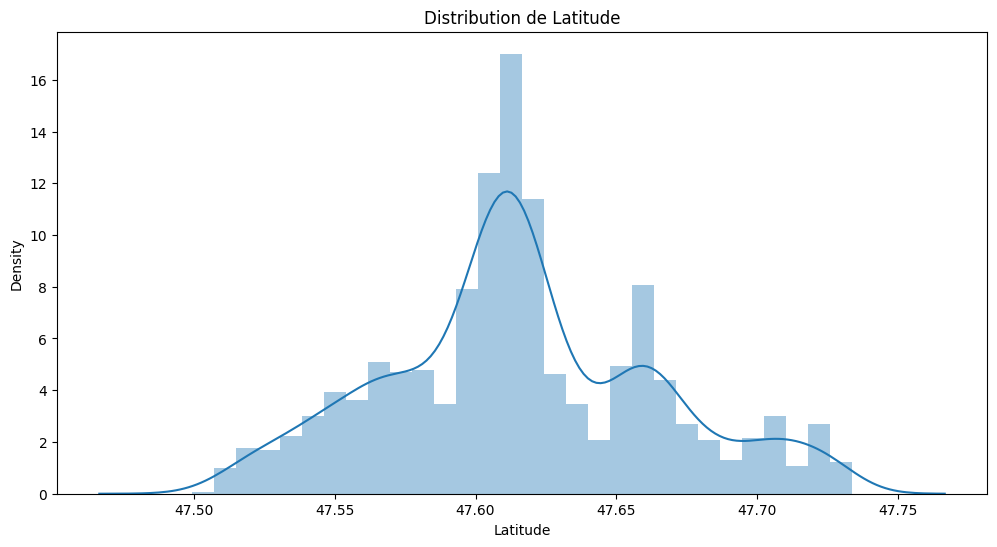

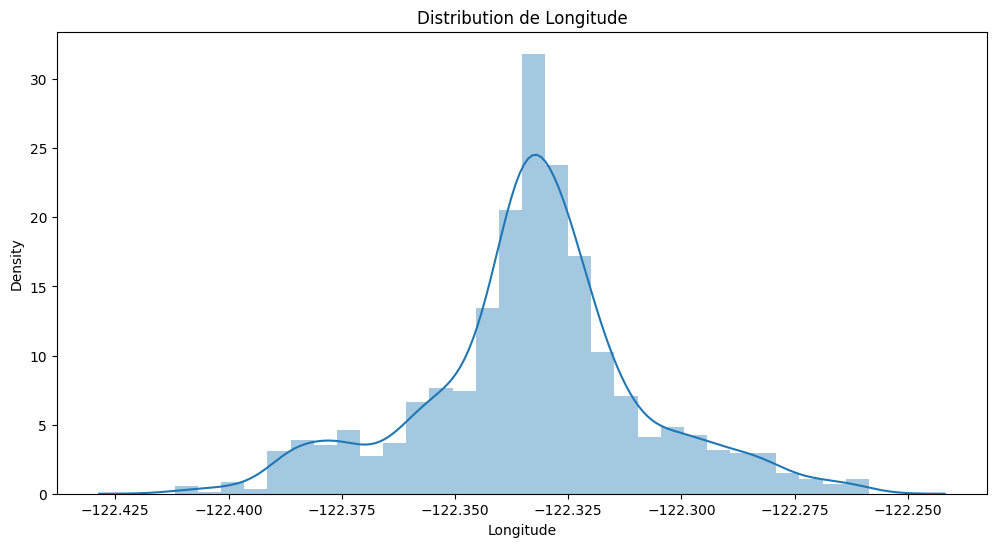

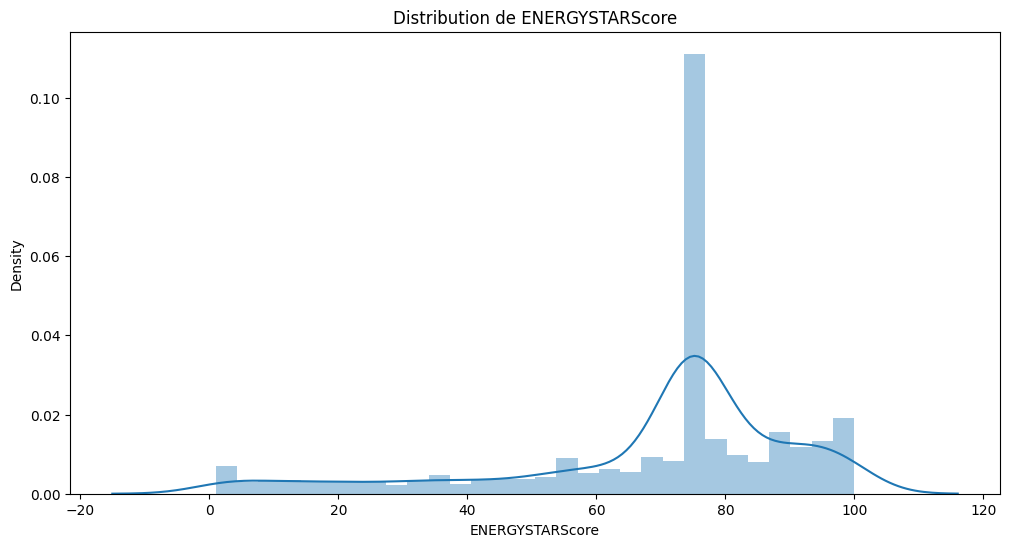

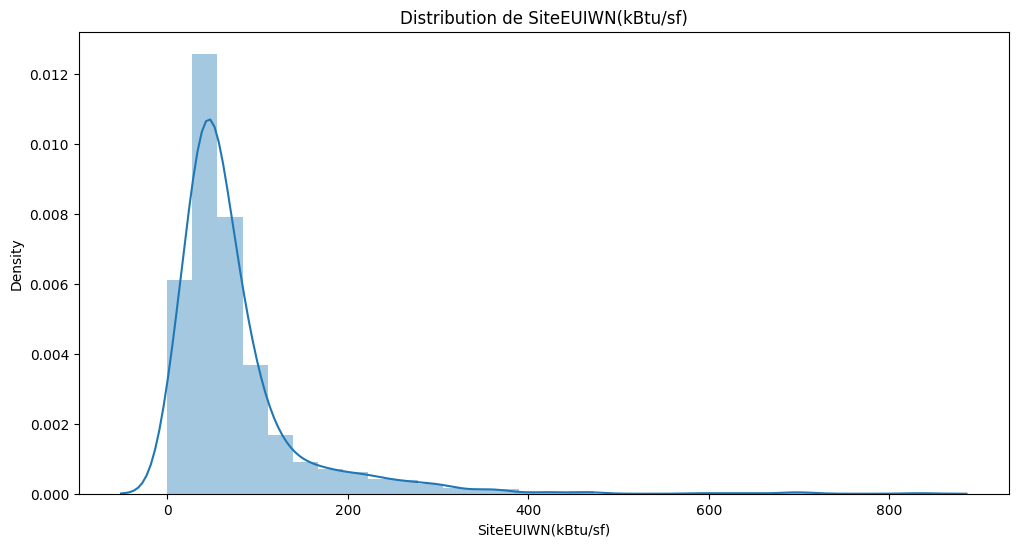

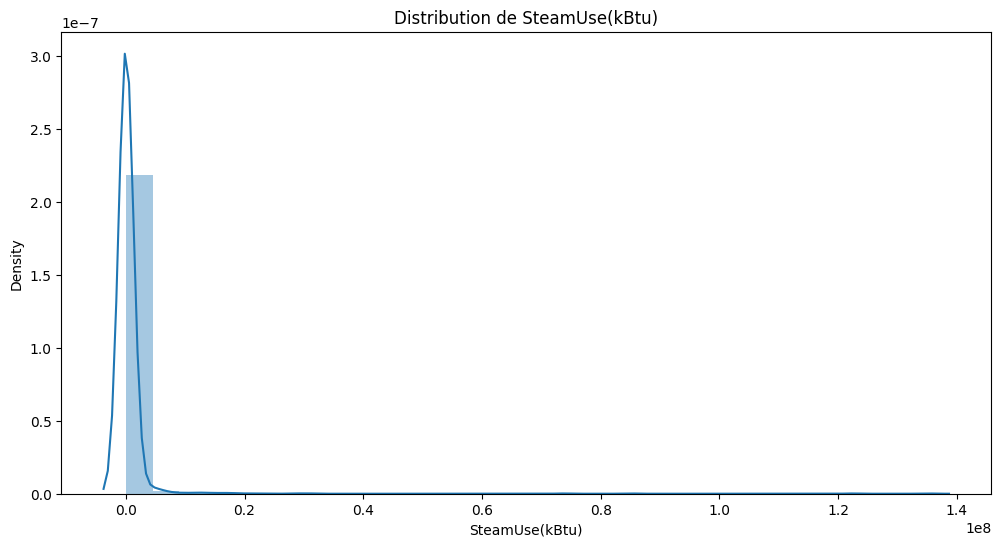

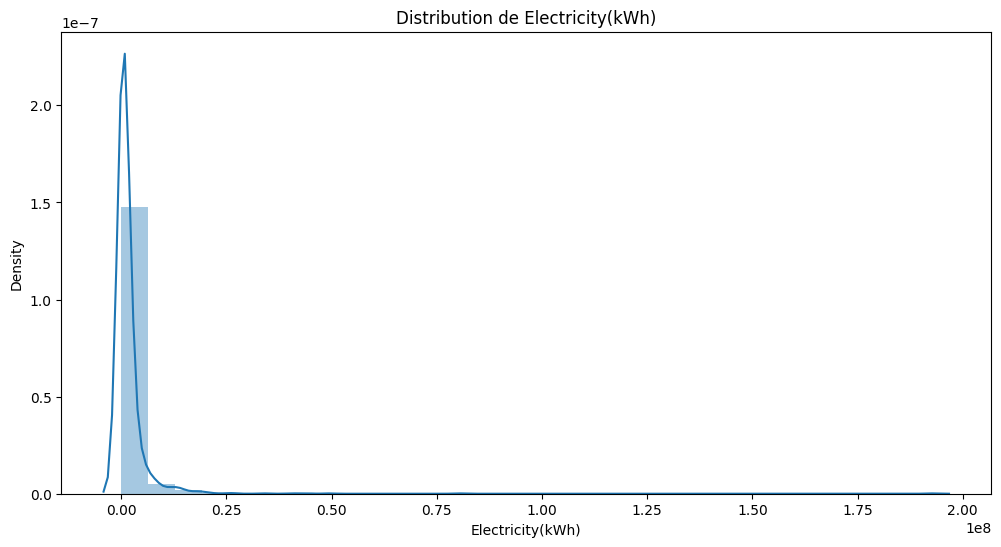

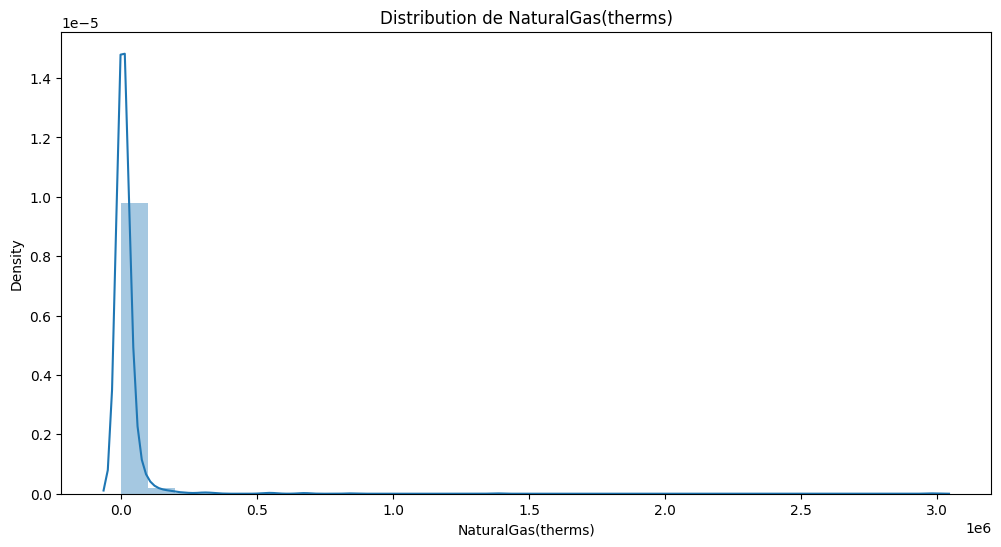

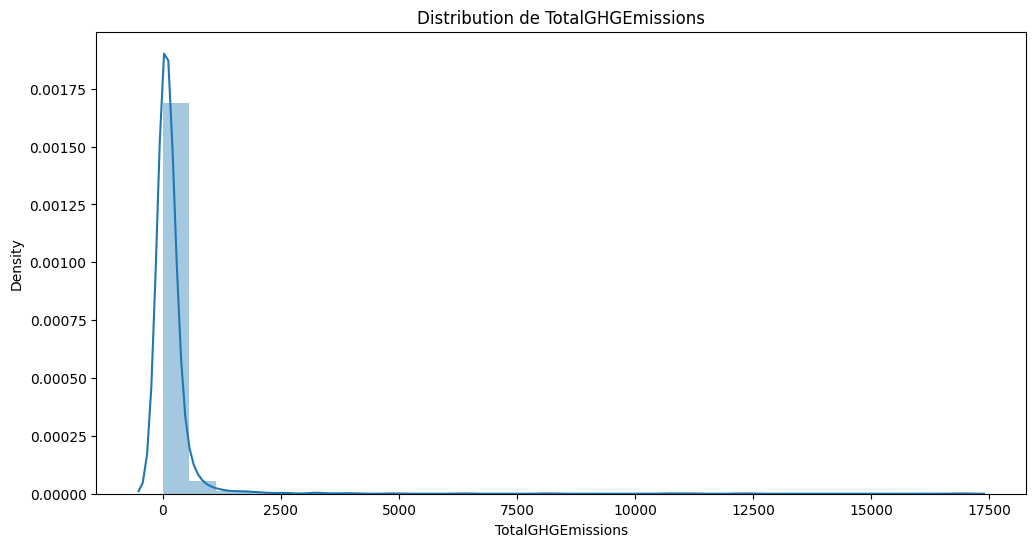

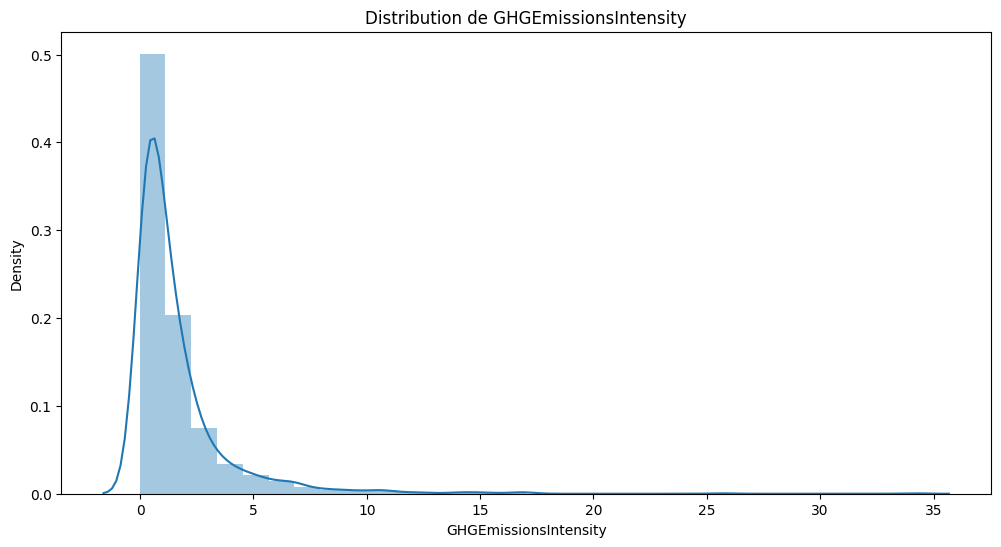

In [ ]:
for column in df.select_dtypes(['int32', 'float64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.distplot(df[column].dropna(), bins=30)

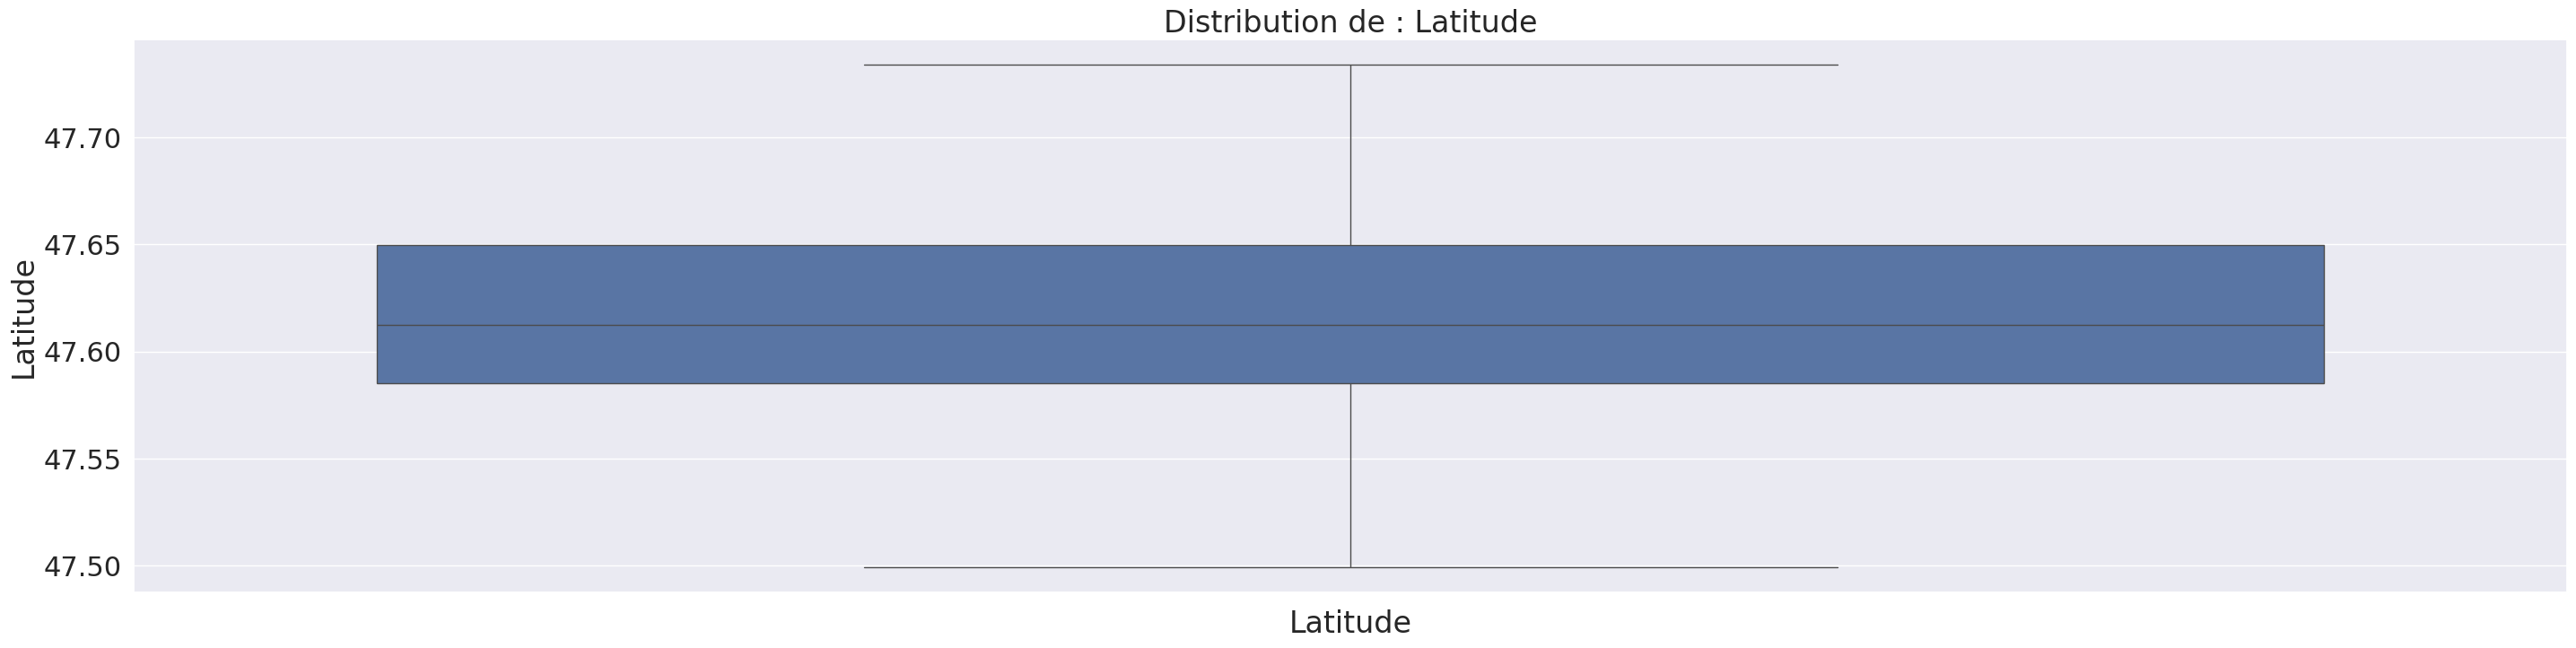

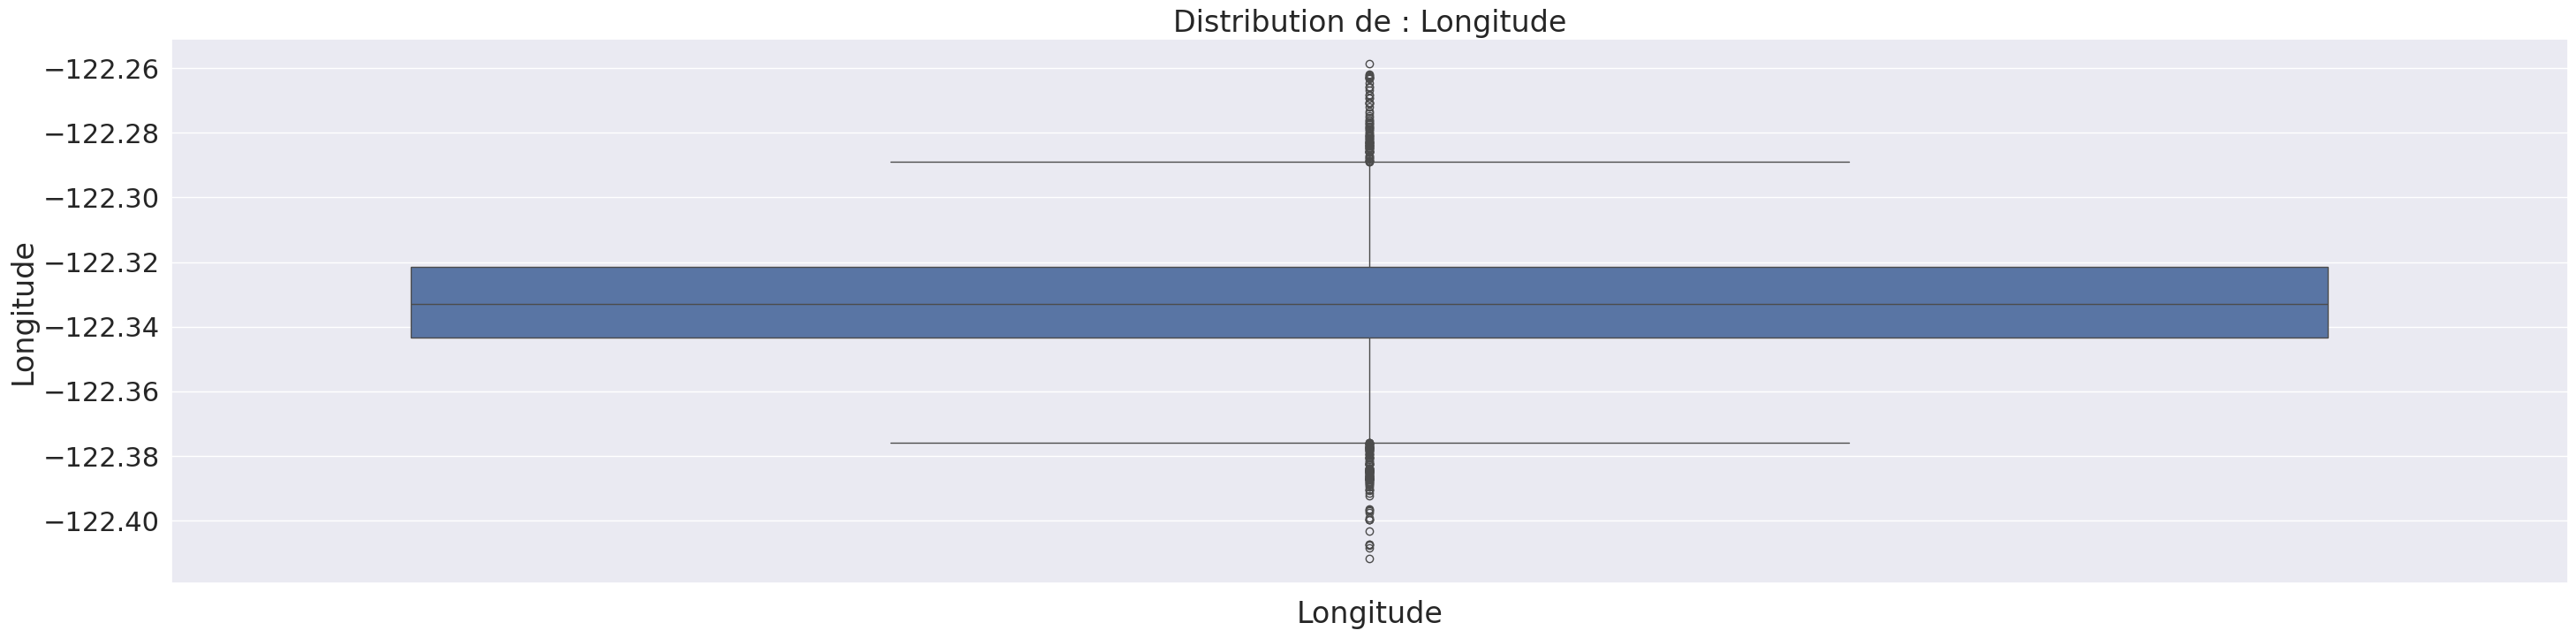

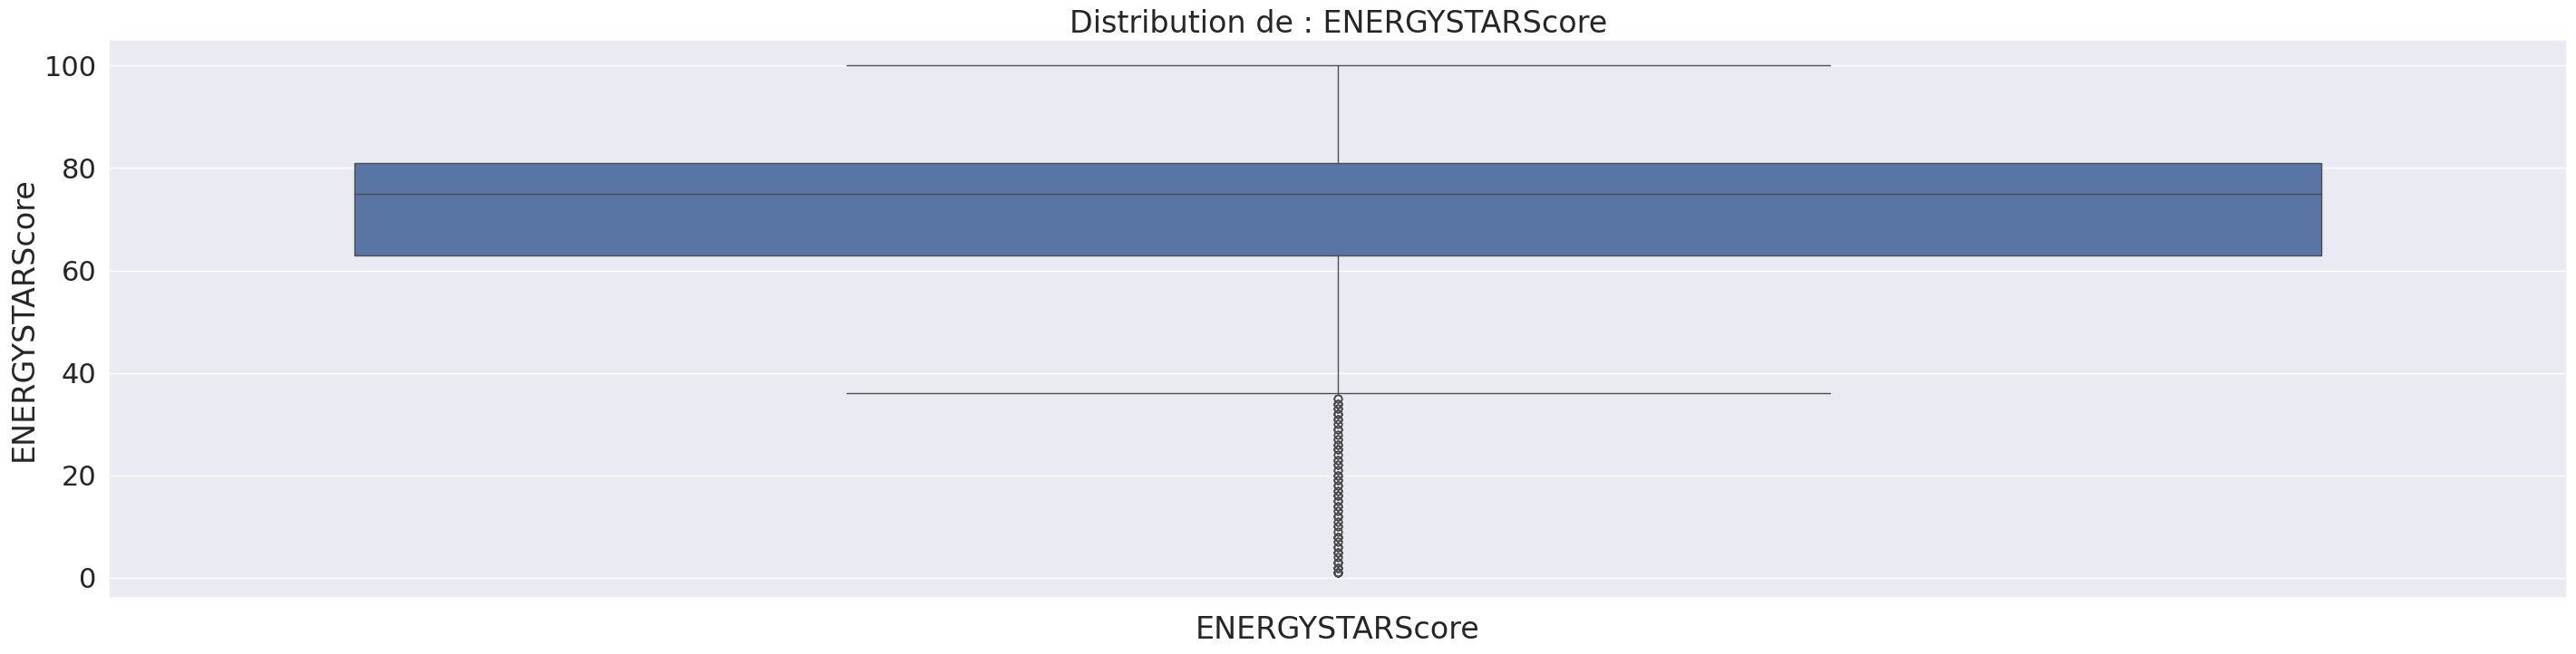

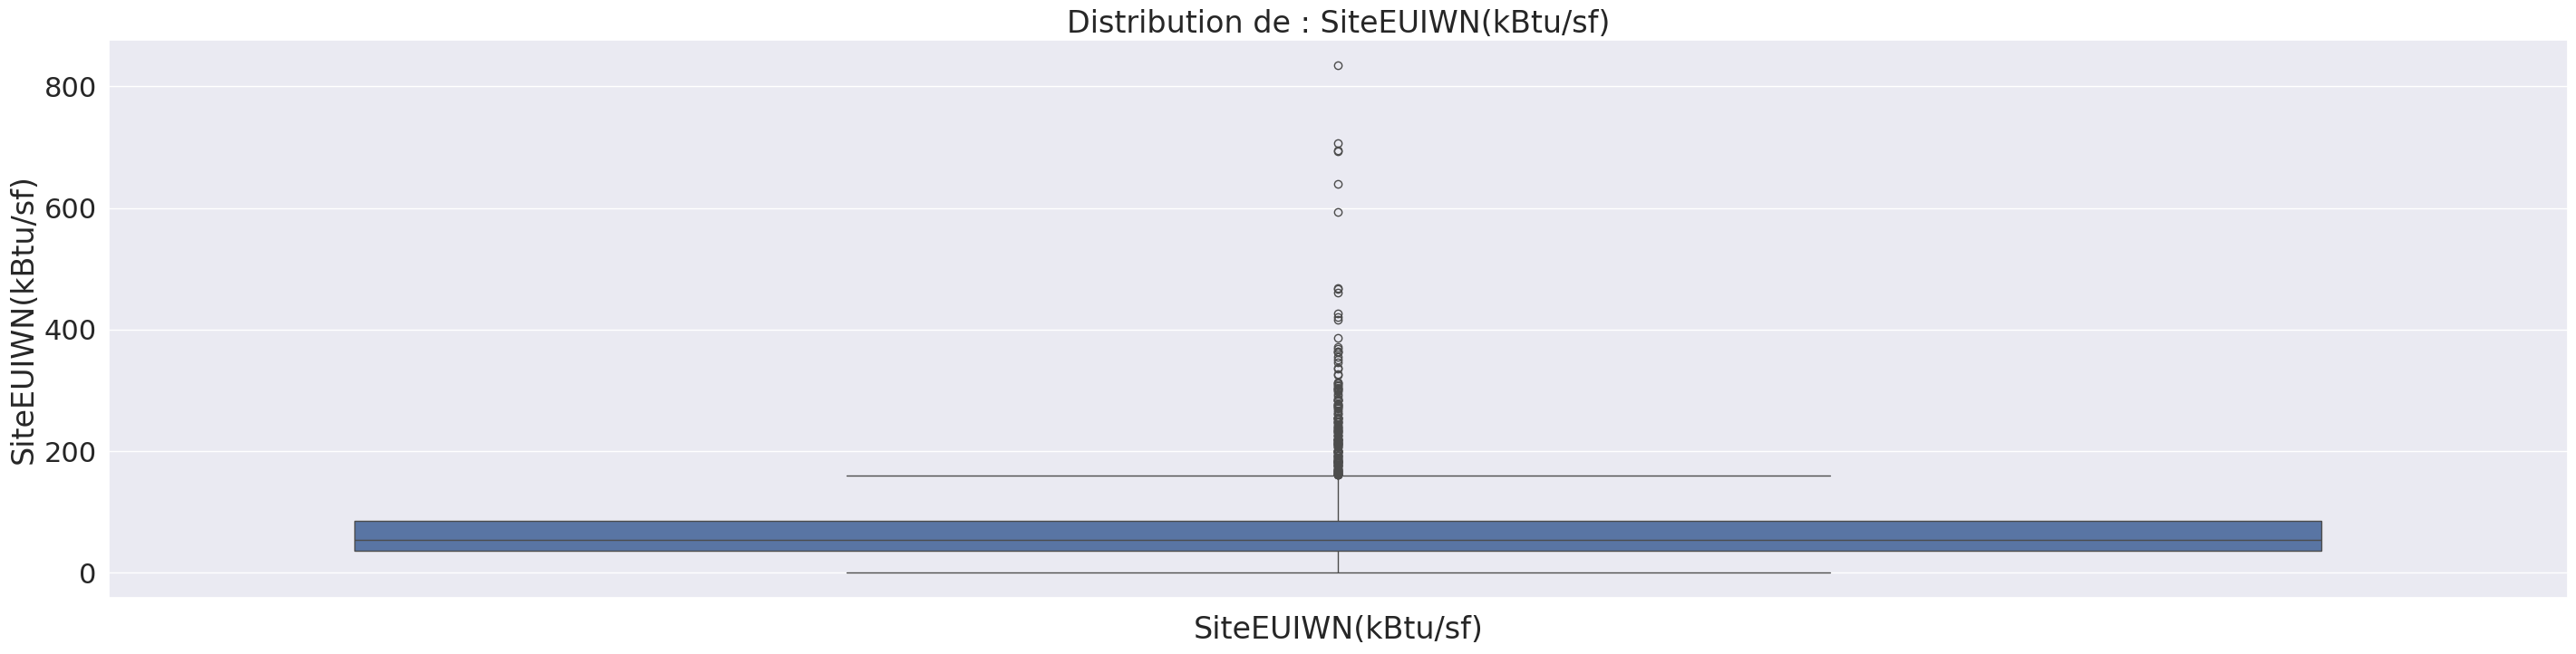

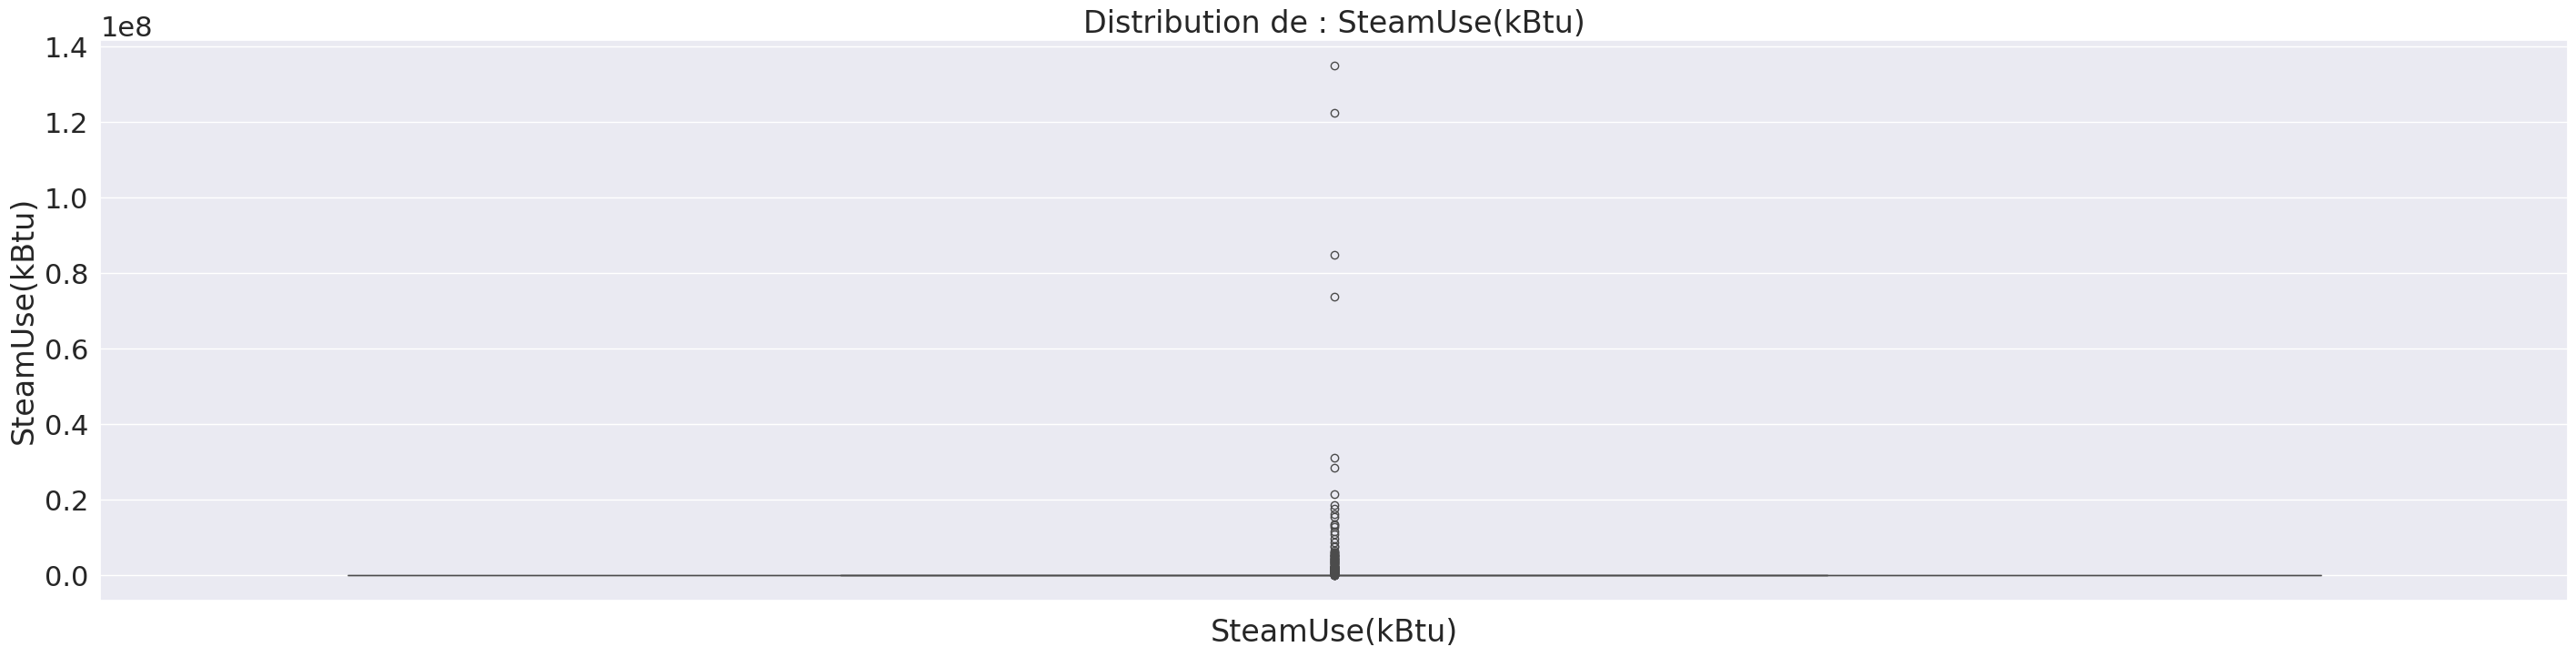

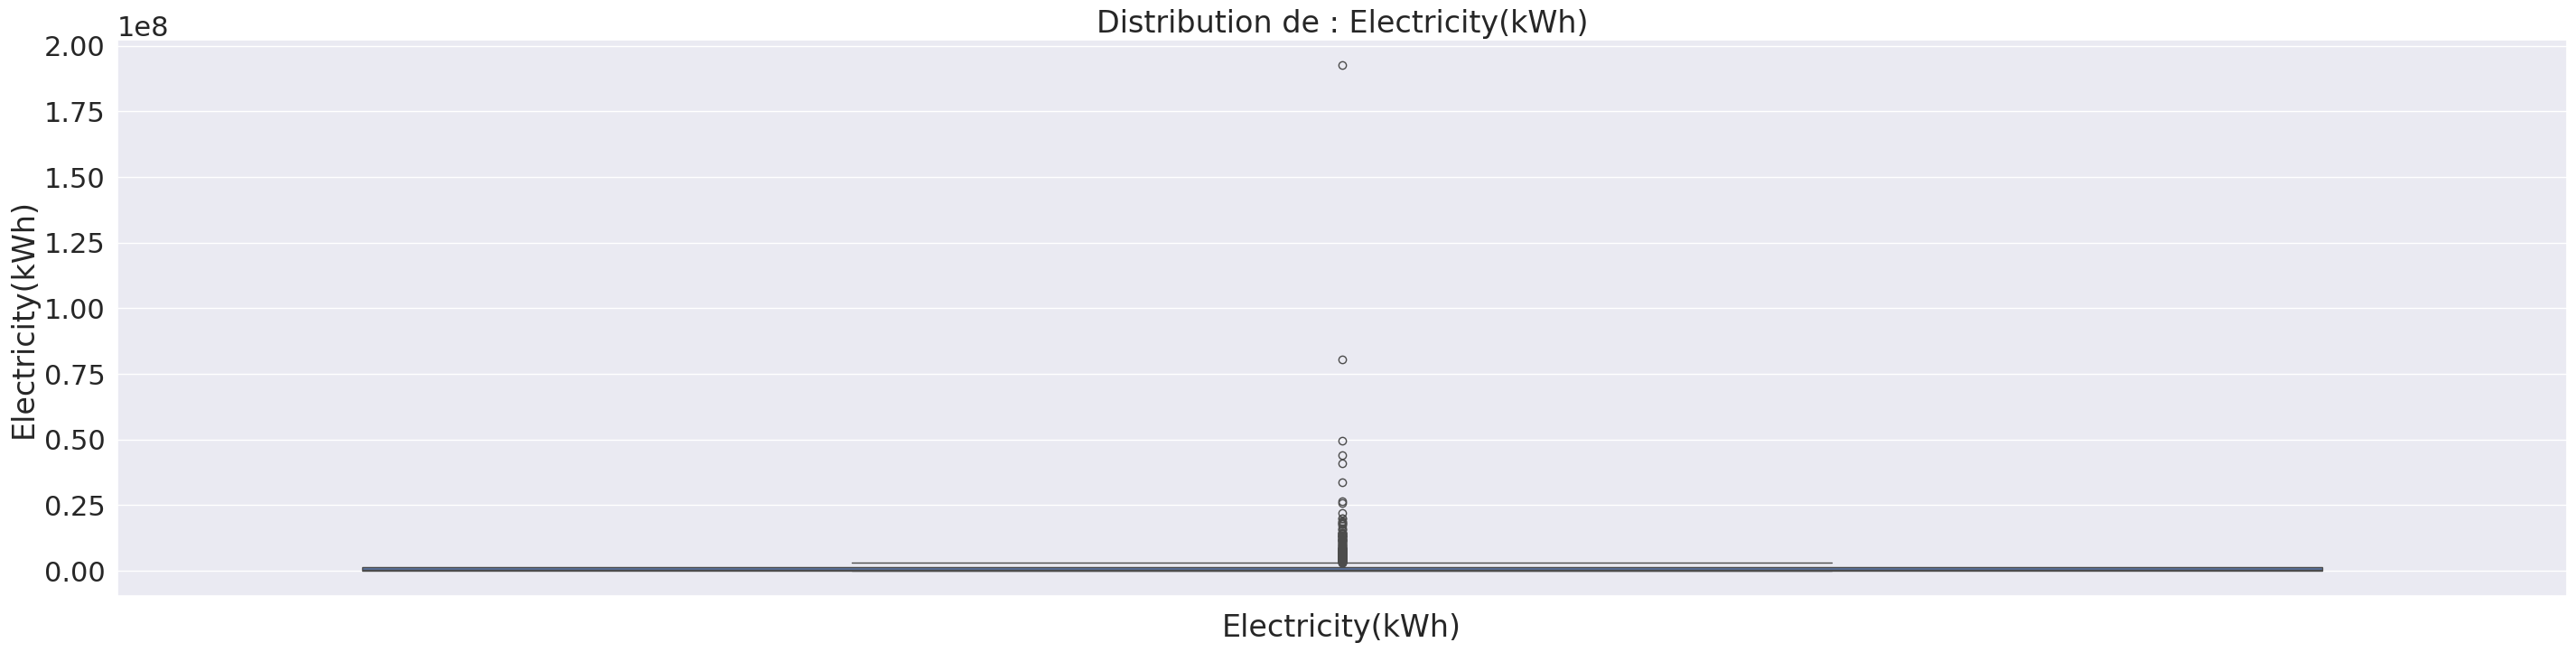

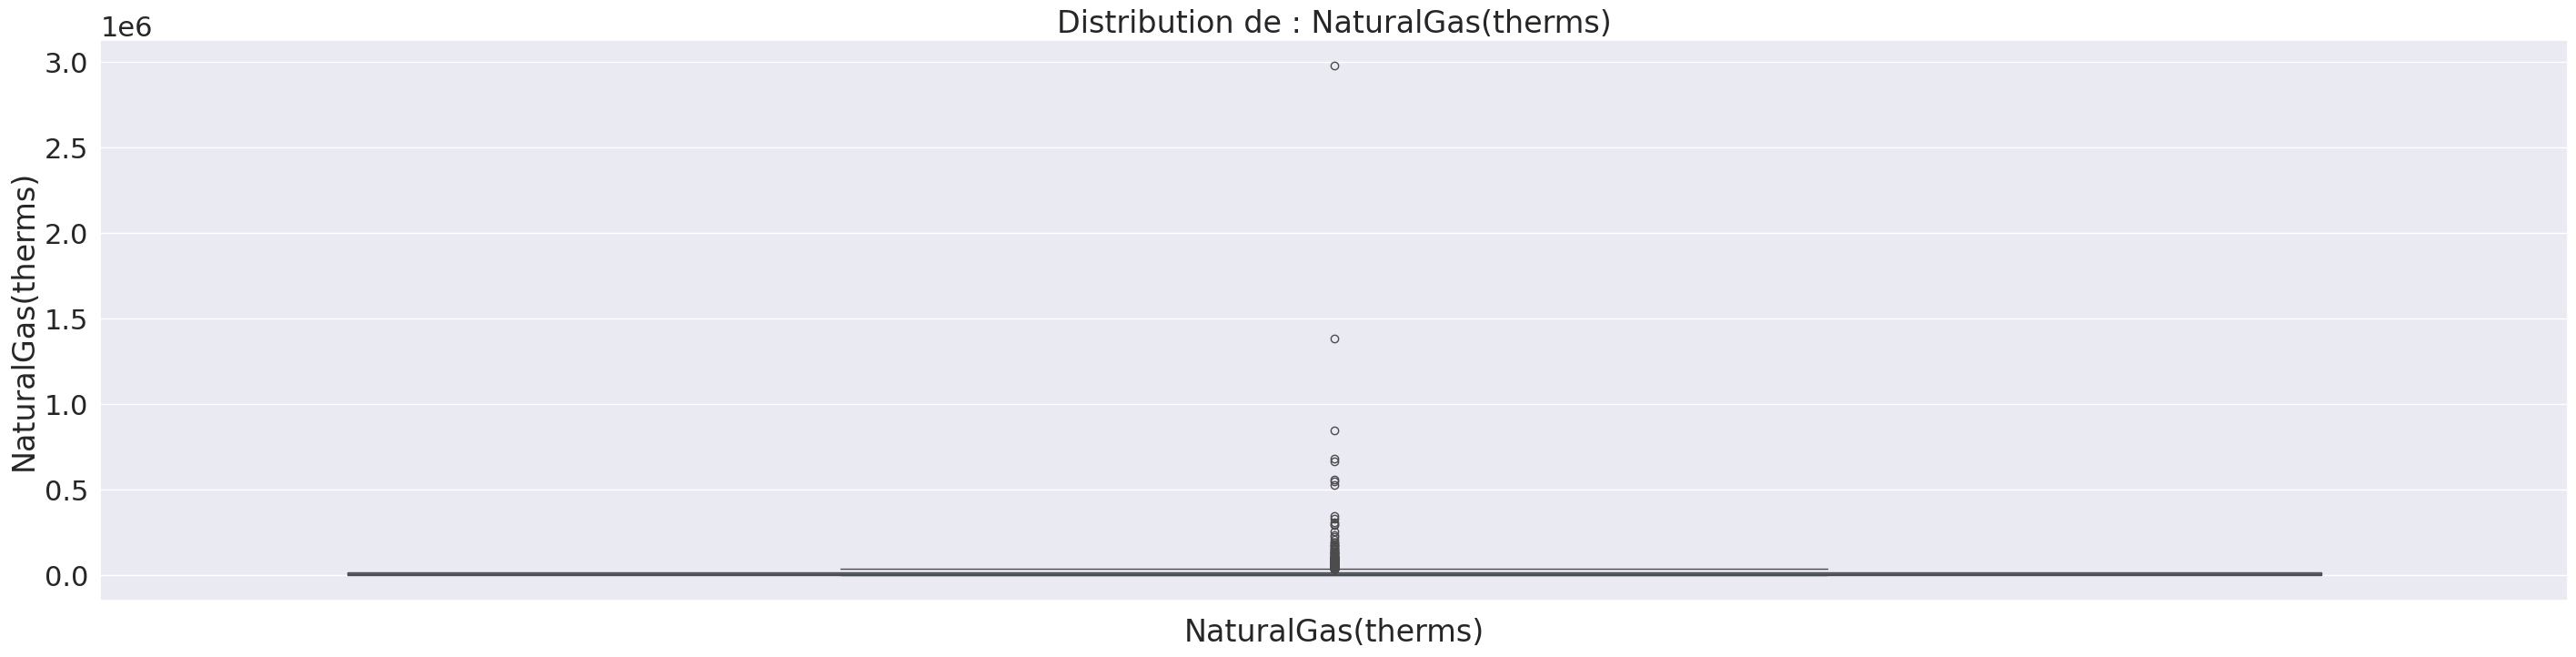

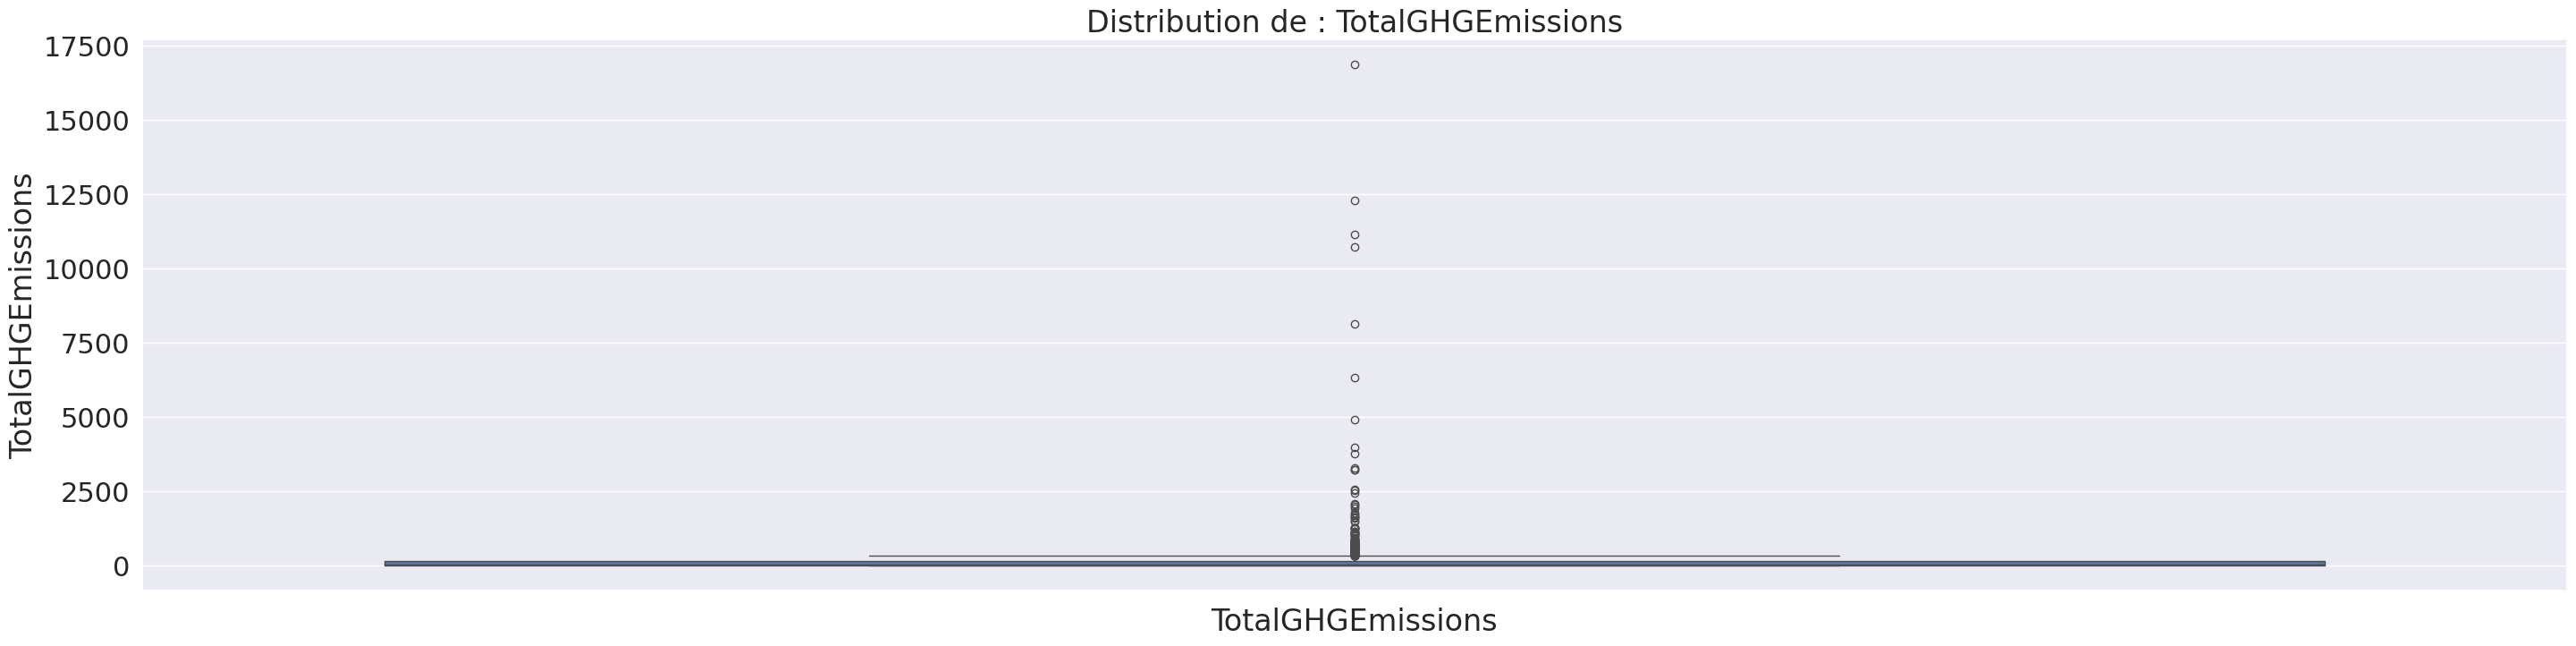

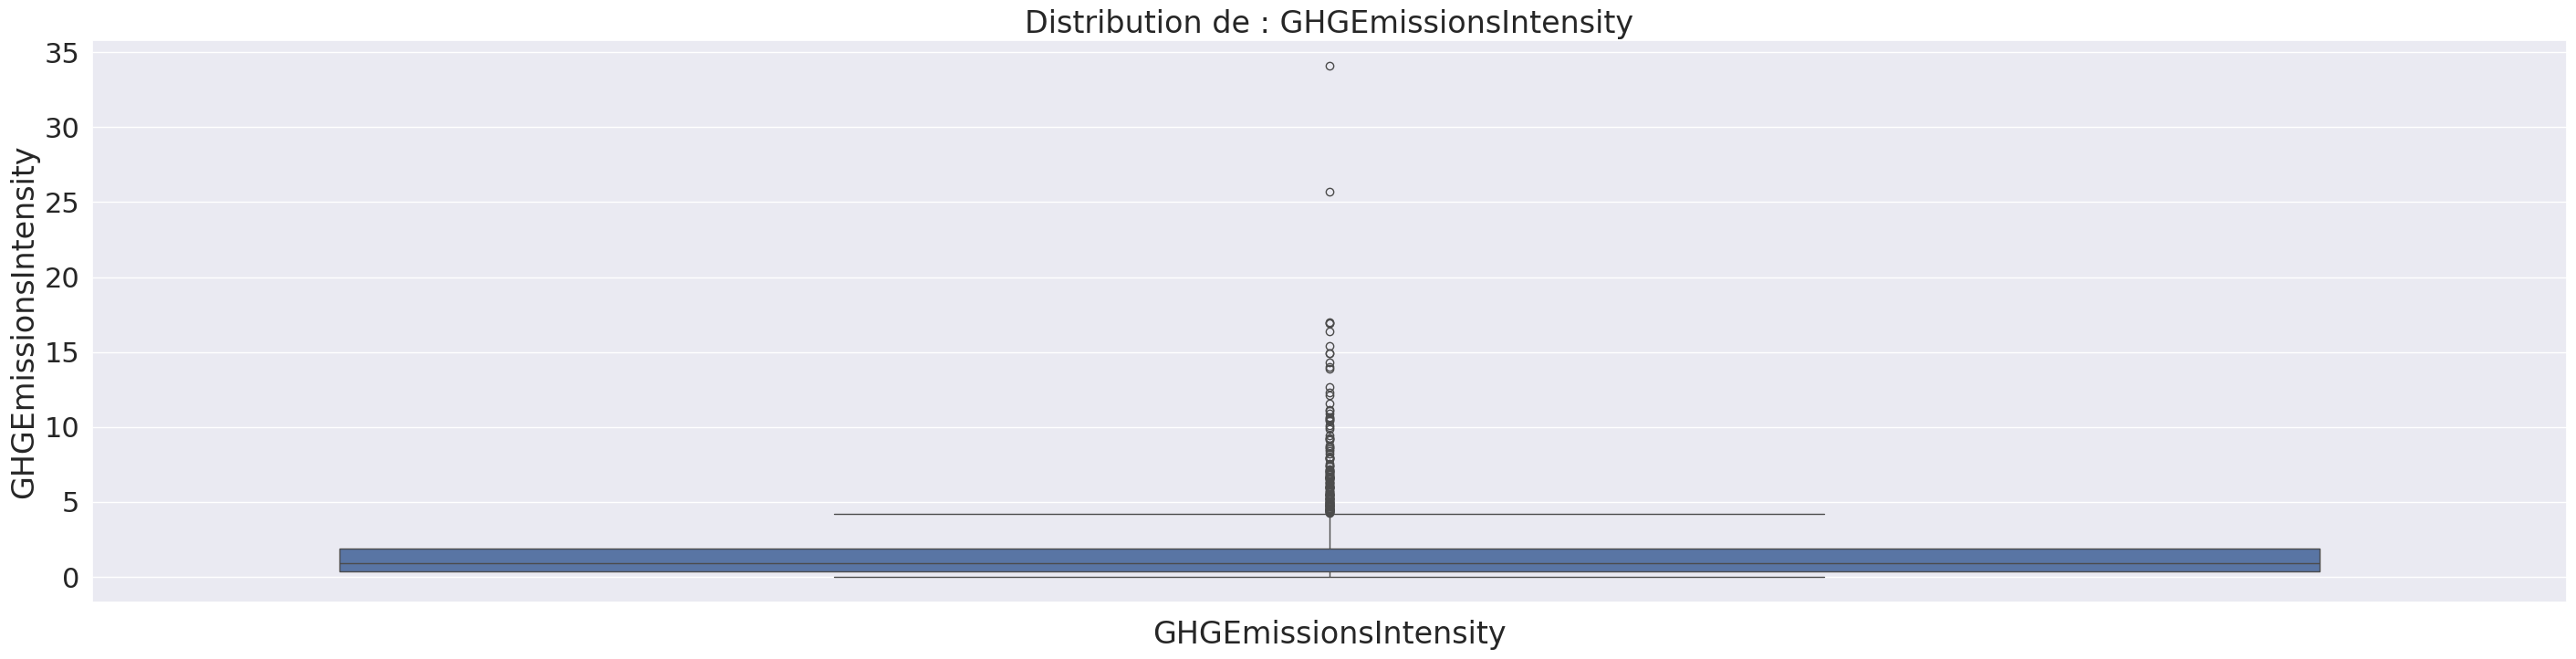

In [ ]:
numeric_columns = df.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (35,8))

    sns.boxplot(df[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

### III.ANALYSES BIVARIEES

### Pairplot

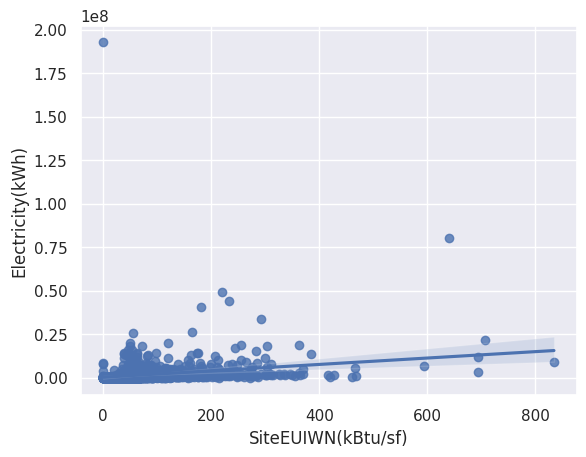

In [ ]:
import seaborn as sns
sns.regplot(x='SiteEUIWN(kBtu/sf)', y='Electricity(kWh)', data=df);

In [ ]:
plot_cols =  ['GHGEmissionsIntensity','NaturalGas(therms)','ENERGYSTARScore','PropertyGFAParking','SiteEUIWN(kBtu/sf)','SteamUse(kBtu)','Electricity(kWh)' ,'NaturalGas(therms)']
quant_data = df.loc[:,plot_cols]
sns.pairplot(data=df, hue="BuildingType", palette="dark")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Heatmap

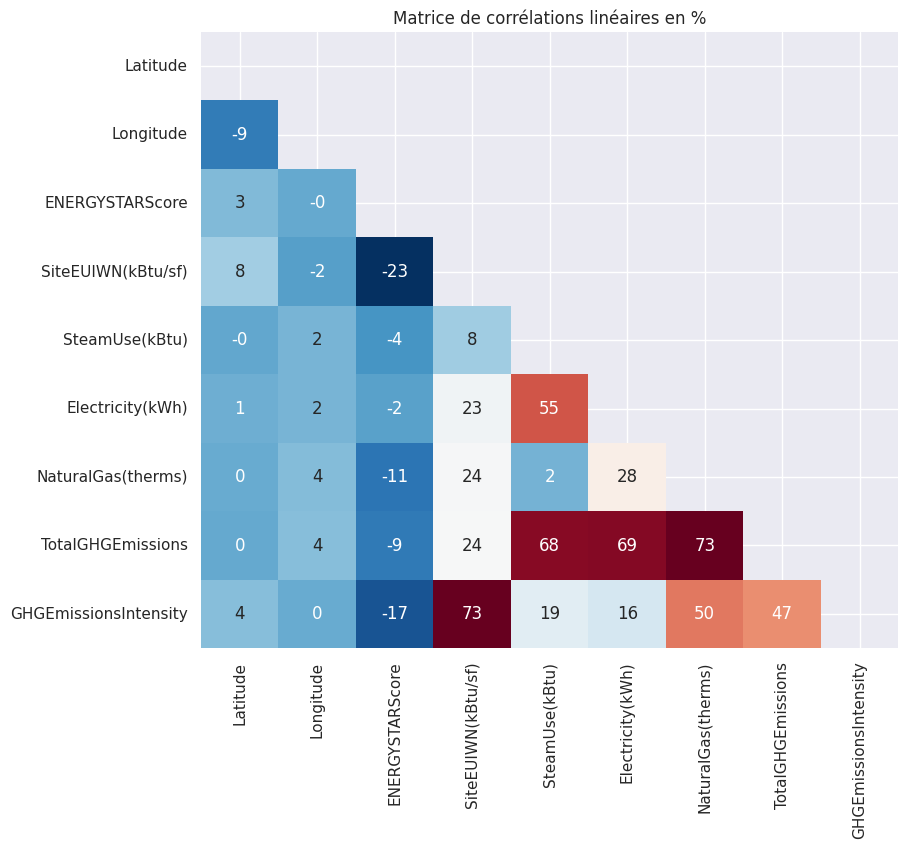

In [ ]:
pearson_correlations = df.select_dtypes(include='float64').corr() * 100
cleanning_mask = np.zeros_like(pearson_correlations)
upper_triangle = np.triu_indices_from(pearson_correlations)
cleanning_mask[upper_triangle] = 1

plt.figure(figsize=(9,8))

sns.heatmap(pearson_correlations, cmap="RdBu_r", mask = cleanning_mask,
           annot = True, fmt=".0f", cbar=False)
plt.title("Matrice de corrélations linéaires en %")
plt.show()

Observations

Corrélation importante entre :

* SteamUse(kBtu) et NumberOfBuildings
* Electricity(KWh) et NumberOfBuildings
* SiteEUIWN(kBtu/sf) et GHGEmissionsItensity
* Electricity(KWh) et SteamUse(kBtu)
* GHGEmissionsItensity et natural gas therm

In [ ]:
df.Neighborhood.value_counts()

Neighborhood
DOWNTOWN                 357
GREATER DUWAMISH         346
MAGNOLIA / QUEEN ANNE    151
LAKE UNION               147
NORTHEAST                127
EAST                     121
NORTHWEST                 86
BALLARD                   69
NORTH                     67
CENTRAL                   56
DELRIDGE                  47
SOUTHEAST                 46
SOUTHWEST                 41
Name: count, dtype: int64

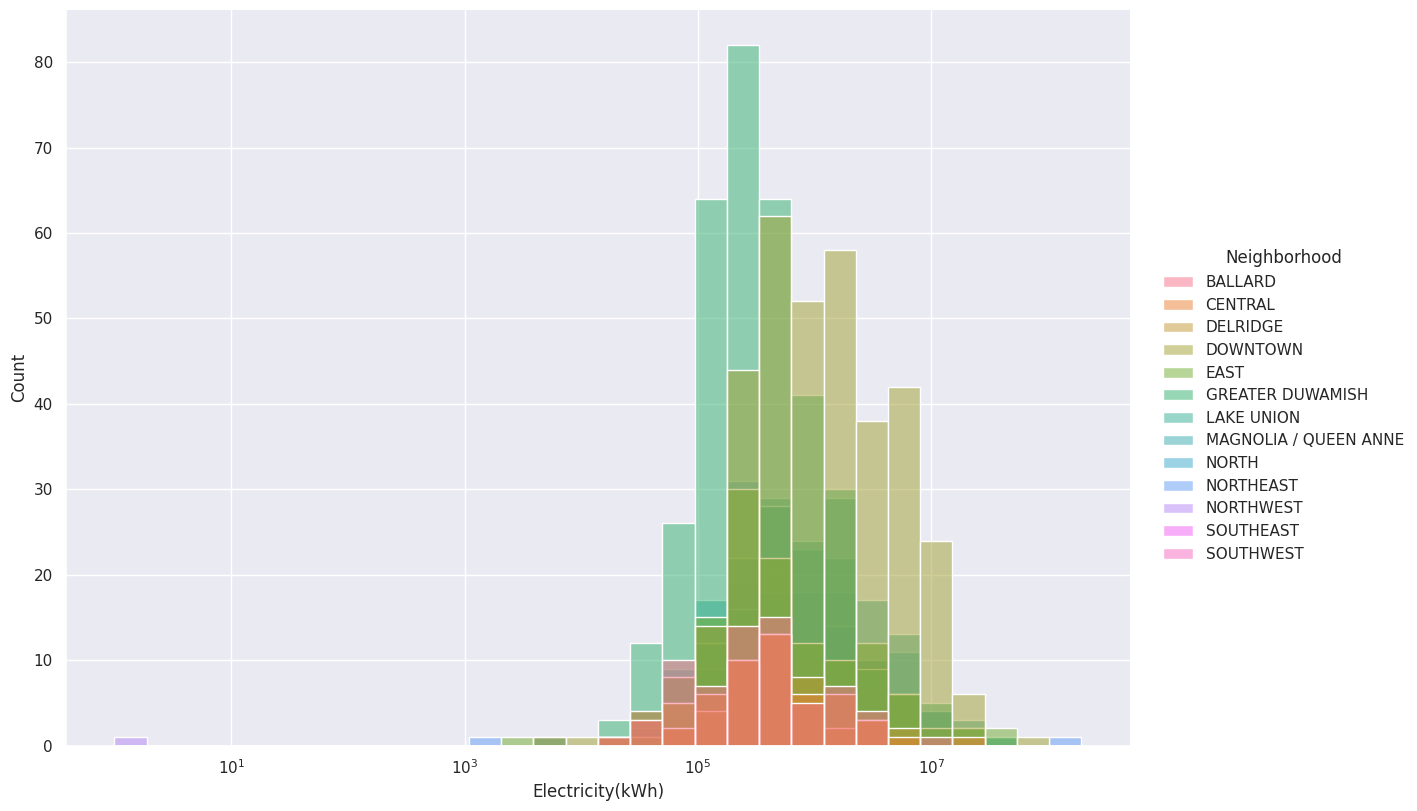

In [ ]:
sns.displot(df, x="Electricity(kWh)", hue='Neighborhood', log_scale=True, bins=30, height=8.27, aspect=11.7/8.27);

## IV.Analyse multivariée

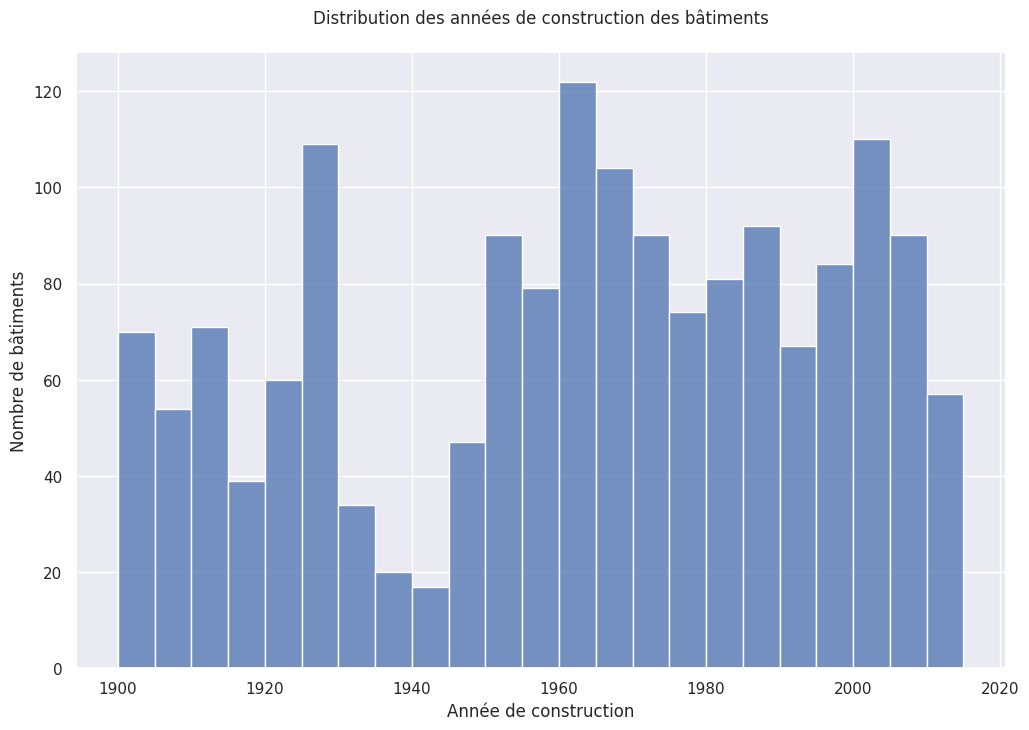

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()

In [ ]:
#This function allows you to view the distribution
#of CO2 emissions within the classes of a variable.
def visualisation(variable,df):
    # the_mean=df["GHGEmissions(MetricTonsCO2e)"].mean()
    the_mean=df["TotalGHGEmissions"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("C02 emissions distribution by {}".format(variable),size=16)
    sns.boxplot(x=variable, y="TotalGHGEmissions", data=df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel(" C02 emissions",size=14)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

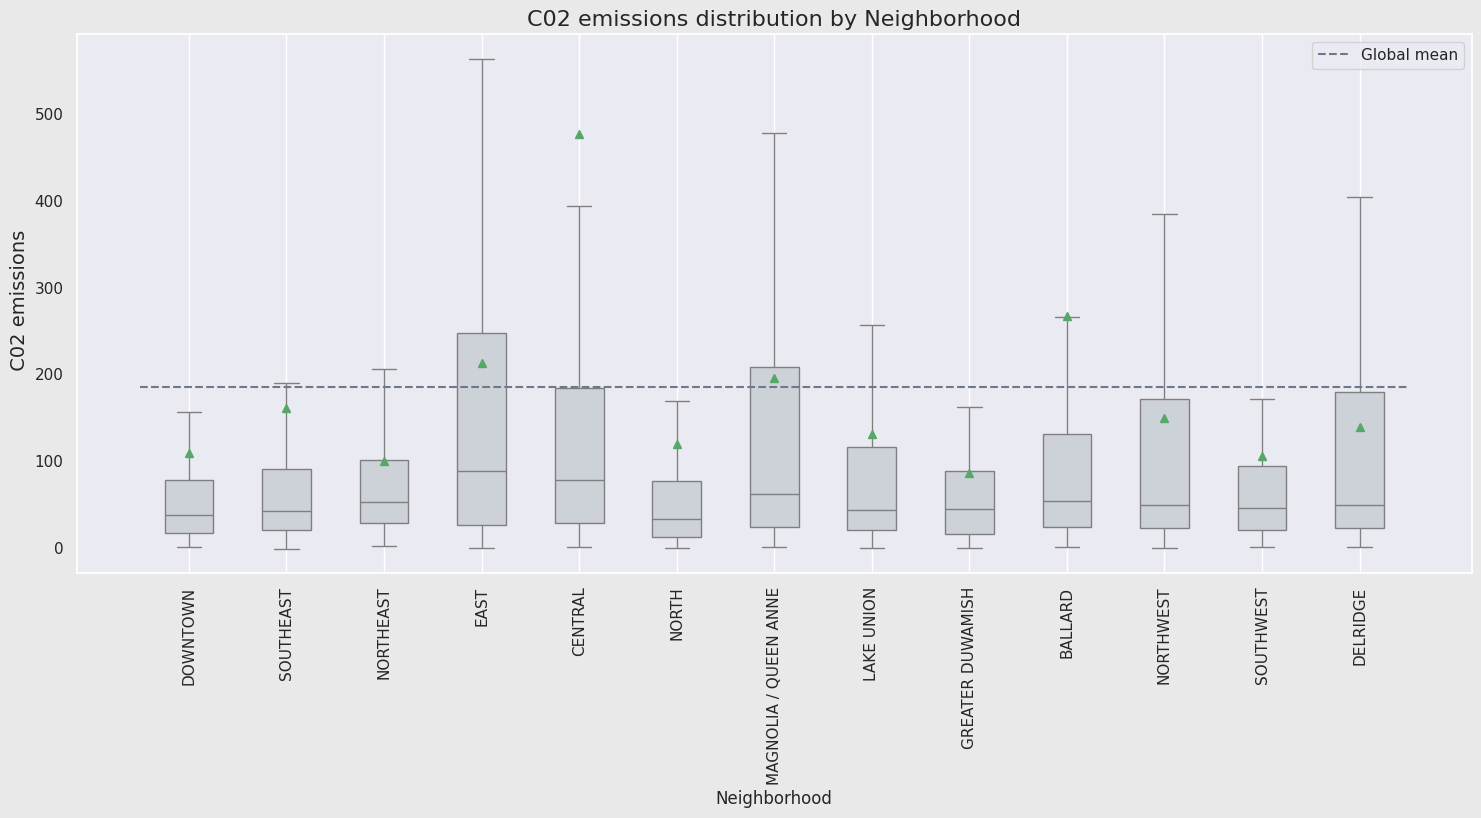

In [ ]:
visualisation('Neighborhood',df)

<ipython-input-59-d23c9da7dbc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SiteEUIWN(kBtu/sf)', y='Neighborhood', data=df, palette="dark")


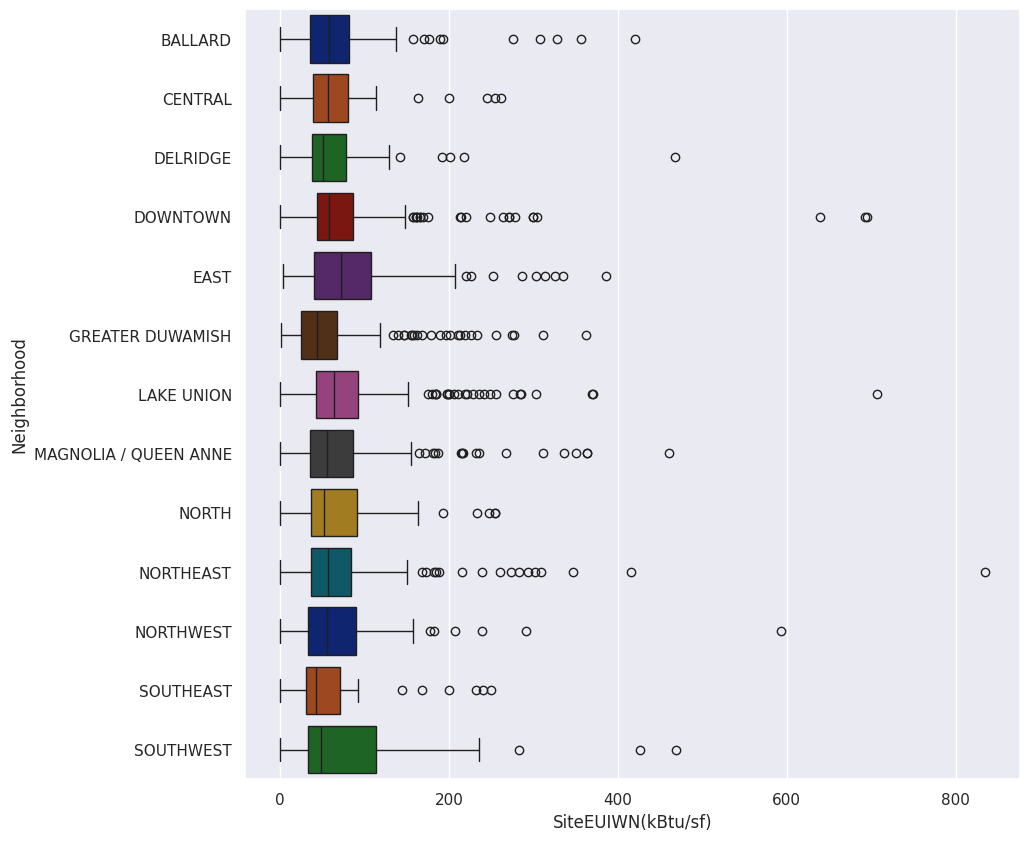

In [ ]:
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='SiteEUIWN(kBtu/sf)', y='Neighborhood', data=df, palette="dark")

<ipython-input-60-63133233a517>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SiteEUIWN(kBtu/sf)', y='BuildingType', data=df, palette="dark")


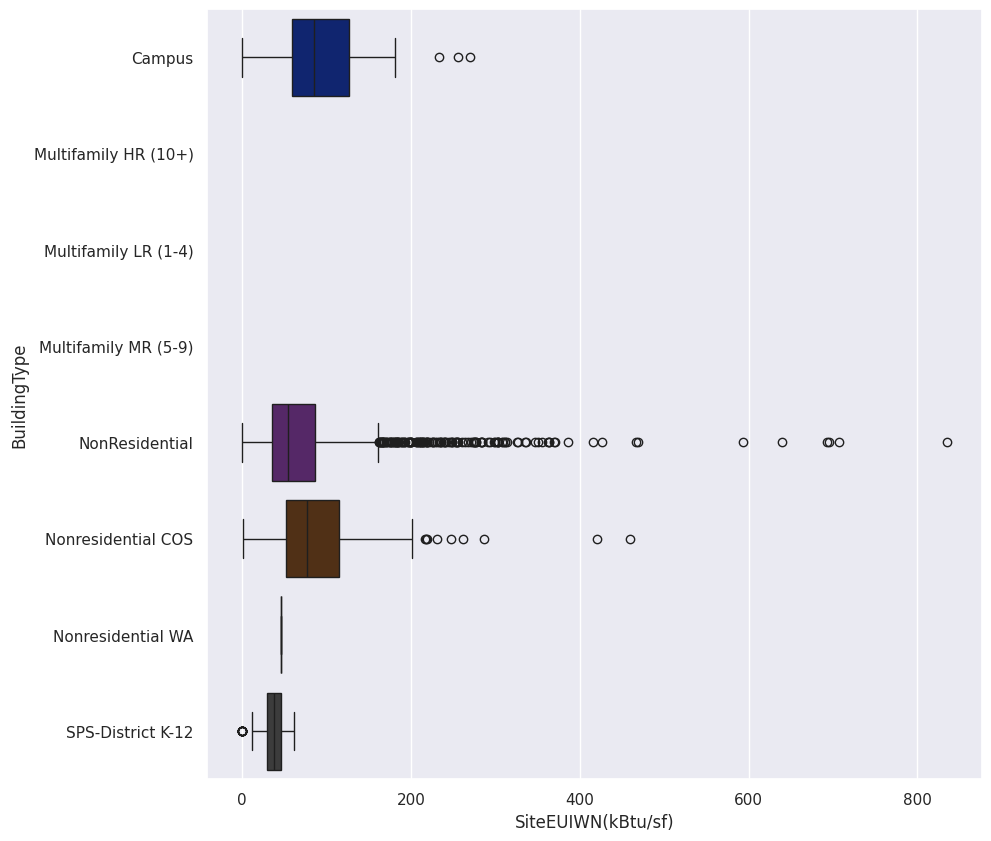

In [ ]:
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='SiteEUIWN(kBtu/sf)', y='BuildingType', data=df, palette="dark")

<ipython-input-61-c63c2d151777>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="SiteEUIWN(kBtu/sf)", y='PrimaryPropertyType', data=df, palette="dark")


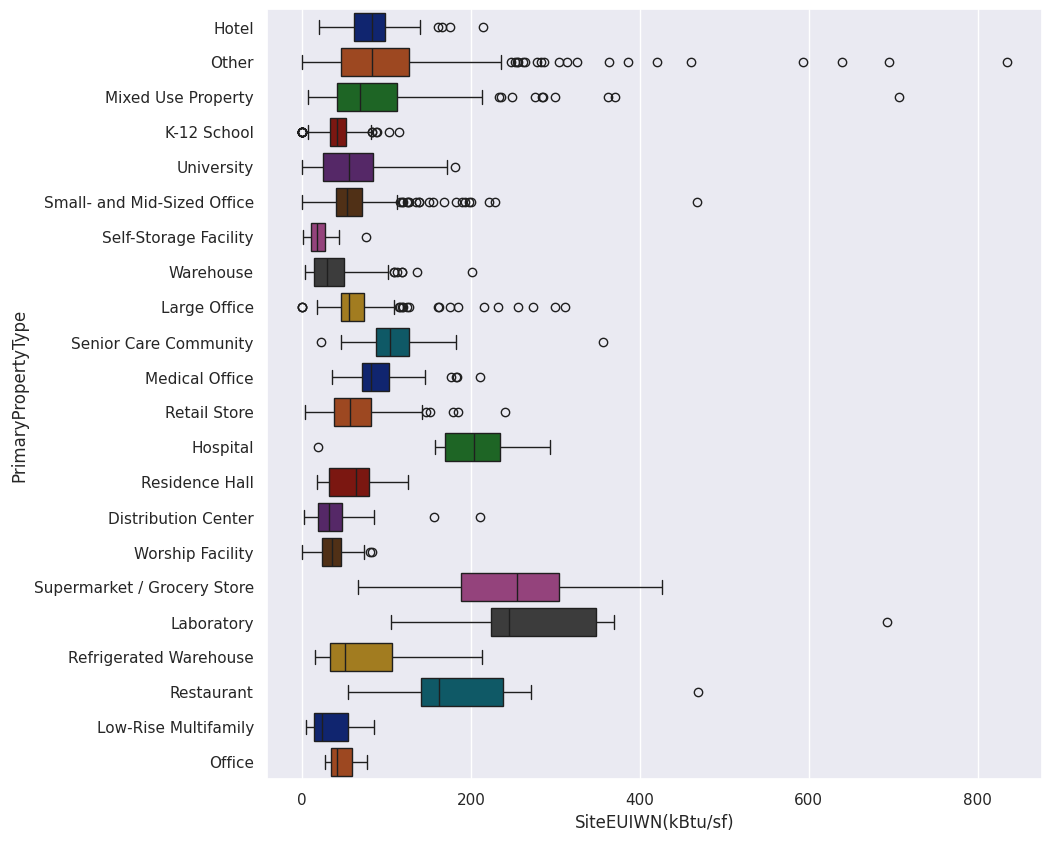

In [ ]:
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="SiteEUIWN(kBtu/sf)", y='PrimaryPropertyType', data=df, palette="dark")

<ipython-input-62-e658f8ce4b33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="TotalGHGEmissions", y='BuildingType', data=df, palette="dark")


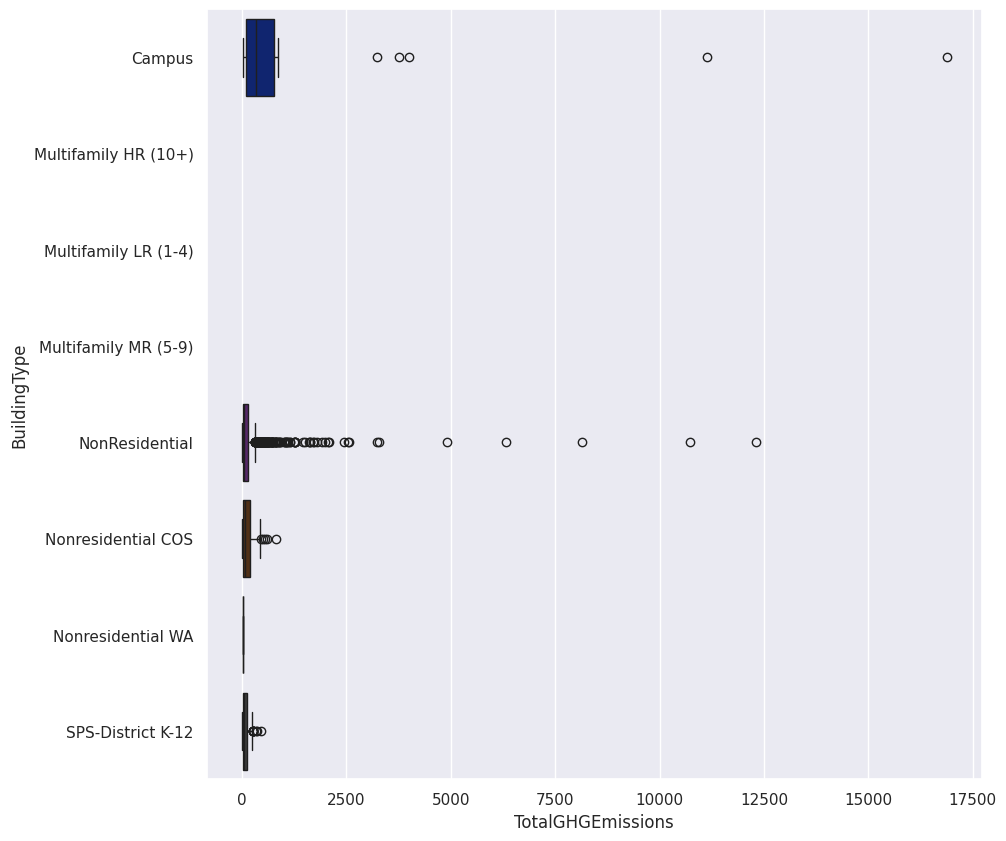

In [ ]:
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="TotalGHGEmissions", y='BuildingType', data=df, palette="dark")

<ipython-input-63-a7b879817672>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df, palette="dark")


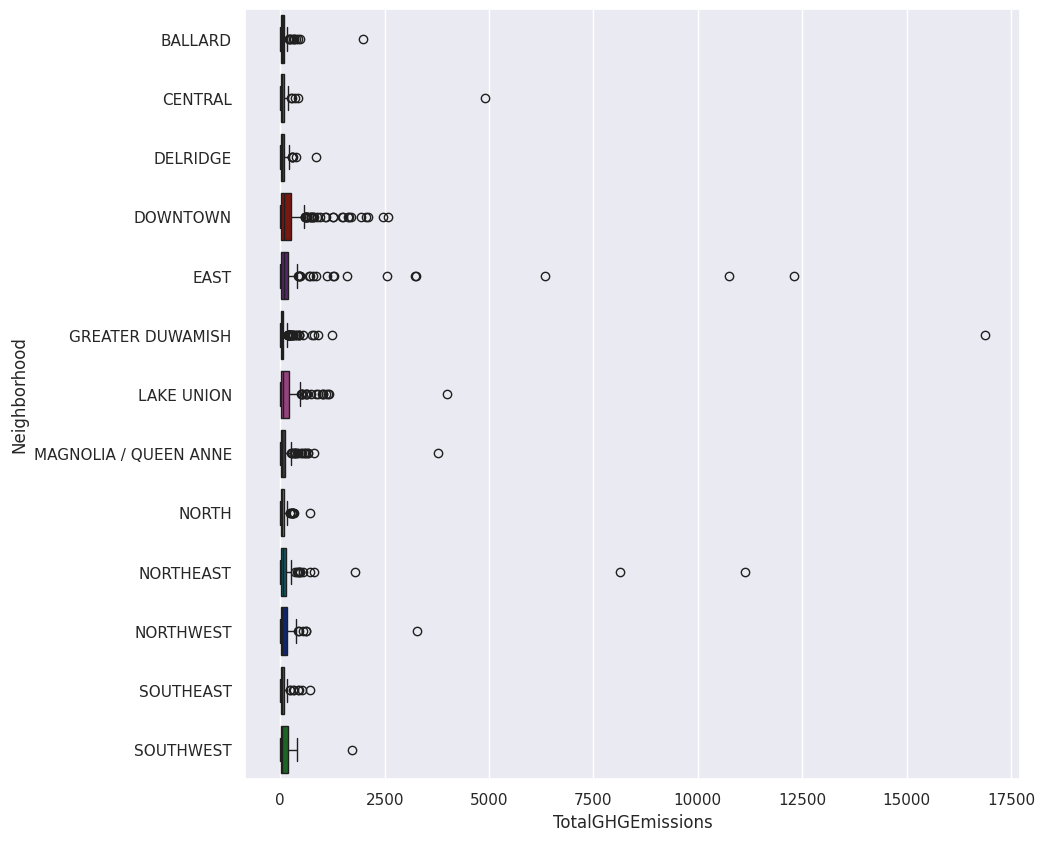

In [ ]:
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df, palette="dark")

### Test d'independance CHI2

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):

    alpha = 0.03

    #H0 : les variables sont indépendantes

    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {},\np : {},\ndof : {}\n'.format(stat_chi2, p, dof))
    print('tableau de contingence : \n', tab_contingence)

    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False

    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [ ]:
x = pd.cut(df['SiteEUIWN(kBtu/sf)'], 20)
for column in df.select_dtypes(include = ['int32','float64']).columns:
    print('test d\'indépendance {} / {}'.format('SiteEUIWN(kBtu/sf)',column))
    if df[column].nunique() > 20 :
        y = pd.cut(df[column], 20).astype('category')
    else:
        y = df[column].astype('category')
    test_chi2(x, y)
    #print('__\nX:\nx')
    #print(x)
    #print('__\nX:\nx')
    #print(y)


    #table = pd.DataFrame({'nutriscore' : x, column : y})
    #print(table.sample(10))
    print('________________________________________________________________________________________________\n')

test d'indépendance SiteEUIWN(kBtu/sf) / Latitude
chi2 : 387.71739954845305,
p : 4.811820825252884e-05,
dof : 285

tableau de contingence : 
 col_0             (47.499, 47.511]  (47.511, 47.523]  (47.523, 47.534]  \
row_0                                                                    
(-0.834, 41.72]                  3                14                11   
(41.72, 83.44]                   2                13                17   
(83.44, 125.16]                  0                 3                 3   
(125.16, 166.88]                 0                 1                 2   
(166.88, 208.6]                  0                 0                 1   
(208.6, 250.32]                  0                 1                 2   
(250.32, 292.04]                 0                 0                 0   
(292.04, 333.76]                 0                 0                 0   
(333.76, 375.48]                 0                 0                 0   
(375.48, 417.2]                  0          

## VI.Analyse géographique


In [ ]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=11)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']],
                      popup=df.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

Output hidden; open in https://colab.research.google.com to view.

## Sélection des variables sur lesquelles nous allons travailler

In [ ]:
#Sélection des variables sur lesquelles nous allons travailler :

df = df.drop(['GHGEmissionsIntensity','NaturalGas(therms)','PropertyGFAParking','Electricity(kWh)','SteamUse(kBtu)'],axis=1)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),TotalGHGEmissions
0,1,2016,NonResidential,Hotel,405 Olive way,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,Hotel,Hotel,60.0,84.300003,249.98
1,2,2016,NonResidential,Hotel,724 Pine street,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,"Hotel, Parking, Restaurant",Hotel,61.0,97.900002,295.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,Hotel,Hotel,43.0,97.699997,2089.28
3,5,2016,NonResidential,Hotel,620 STEWART ST,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,Hotel,Hotel,56.0,113.300003,286.43
4,8,2016,NonResidential,Hotel,401 LENORA ST,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,"Hotel, Parking, Swimming Pool",Hotel,75.0,118.699997,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,1600 S Dakota St,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,Office,Office,46.0,76.699997,20.94
3372,50223,2016,Nonresidential COS,Other,719 8th Ave S,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,Other - Recreation,Other - Recreation,75.0,65.900002,32.17
3373,50224,2016,Nonresidential COS,Other,1920 1st Ave W,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,75.0,460.100006,223.54
3374,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th Ave S,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,75.0,55.500000,22.11


In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

## Enregitrement du nouveau dataframe

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/P4/seattle_data.csv', index=False)